##  Predict price of houses

#### Overview
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.

#### Business Goal 
Model the price of houses with the available independent variables and identify fowllowing:-
1. Which variables are significant in predicting the price of a house, and
2. How well those variables describe the price of a house.

#### Approach
The solution is divided into the following steps:-
1. Import Data and python packages
2. Data Cleaning
3. EDA
4. Data Prepation
5. Model Building
6. Model Evaluation


### 1.Import Data and python packages

In [1]:
#import libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score,mean_squared_error

#hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
#reading the dataset
house_price_df = pd.read_csv('train.csv')

#preview dataset
house_price_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print('The dataset consists of {} observations and {} attributes.'.format(house_price_df.shape[0],house_price_df.shape[1]))

The dataset consists of 1460 observations and 81 attributes.


### 2.Data Cleaning
    2.1 Handling missing values
    2.2 Handling incorrect datatypes
    2.3 Handling Outliers

### 2.1 Handling missing values

In [4]:
#drop column id as it uniquely identifies each row and conveys no information about predictor variable SalesPrice
house_price_df.drop(['Id'],axis=1,inplace=True)

In [5]:
#check percentage of missing values in the dataset(ascending order)
missing_val_perc = round((house_price_df.isnull().sum()/len(house_price_df.index))*100,2)

missing_val_df = pd.DataFrame({'missing %':missing_val_perc})
missing_val_df.sort_values(by=['missing %'],inplace=True)
missing_val_df.head(81)

,missing %
MSSubClass,0.00
TotalBsmtSF,0.00
Heating,0.00
SaleCondition,0.00
CentralAir,0.00
1stFlrSF,0.00
2ndFlrSF,0.00
LowQualFinSF,0.00
GrLivArea,0.00
BsmtFullBath,0.00


#### 2.1.1 Inspecting rows with missing values : starting with highest missing records

In [6]:
#drop PoolQC and MiscFeature as it has more than 95% missing values
house_price_df.drop(['PoolQC','MiscFeature'],axis=1,inplace=True)

In [7]:
#Inspecting variables PoolQC
#house_price_df['PoolQC'].value_counts(dropna=False)

In [8]:
#Inspecting variables MiscFeature
#house_price_df['MiscFeature'].value_counts(dropna=False)

In [9]:
#Inspecting variables Fence
house_price_df['Fence'].value_counts(dropna=False)

NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [10]:
#Inspecting variables Alley
house_price_df['Alley'].value_counts(dropna=False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

<p><span style='color:Blue'>If we check data dictionary we observe that the variables PoolQC,MiscFeature,Fence,Alley have 'NA' as one of their options.It may be possible that these 'NA' values are converted to 'NAN'.Therefore converting 'NAN' back to 'NA'</span></p>

In [11]:
#converting NAN to 'NA'
#house_price_df['PoolQC'].fillna('NA',inplace=True)
#house_price_df['MiscFeature'].fillna('NA',inplace=True)
house_price_df['Fence'].fillna('NA',inplace=True)
house_price_df['Alley'].fillna('NA',inplace=True)

In [12]:
#Inspecting variables FireplaceQu
house_price_df['FireplaceQu'].value_counts(dropna=False)#can combine this ved1

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

<p><span style='color:Blue'>Replacing "NAN" with "NA:No Fireplace"</span></p>

In [13]:
house_price_df['FireplaceQu'].fillna('NA',inplace=True)

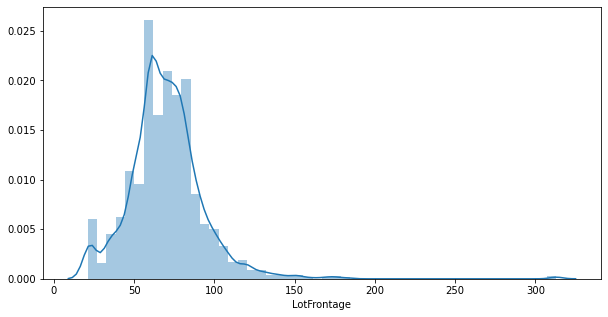

In [14]:
#Inspecting variables LotFrontage : Continuous variable
#probability distribution of LotFrontage
plt.figure(figsize=(10,5))
sns.distplot(house_price_df['LotFrontage'])
plt.show()

We notice spike in number of houses having LotFrontage between 21 to 25

In [15]:
#checking summar statistics for LotFrontage
house_price_df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

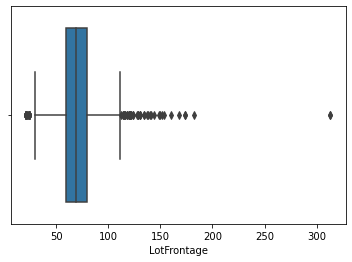

In [16]:
#checking  outliers in LotFrontage
sns.boxplot(house_price_df['LotFrontage'])
plt.show()

we notice outliers beyond minimum as well as maximum range

There are 17.74% missing values for LotFrontage.Since, the data has outliers we would impute missing values with median 

In [17]:
#Impute values with median=69.0
house_price_df['LotFrontage'].fillna(house_price_df['LotFrontage'].median(skipna=True),inplace=True)

In [18]:
#Inspecting variables GarageType:categorical variable
house_price_df['GarageType'].value_counts(dropna=False)

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

<p><span style='color:Blue'>Replacing "NAN" to "NA:No Garage"</span></p>

In [19]:
house_price_df['GarageType'].fillna('NA',inplace=True)

In [20]:
#Inspecting variables GarageCond:categorical variable
house_price_df['GarageCond'].value_counts(dropna=False)#CAN COMBINE VED

TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64

<p><span style='color:Blue'>Replacing "NAN" with "NA:No Garage"</span></p>

In [21]:
house_price_df['GarageCond'].fillna('NA',inplace=True)

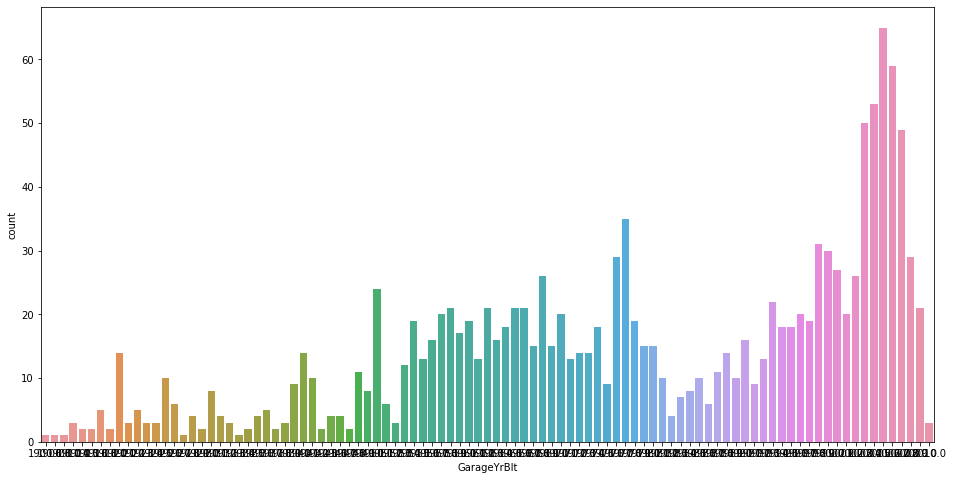

In [22]:
#Inspecting variables GarageYrBlt:continuous variable
plt.figure(figsize=(16,8))
sns.countplot(house_price_df['GarageYrBlt'])
plt.show()

Attribute GarageYrBlt has incorrect format .We will convert this from decimal to datetime under correcting datatypes section.

In [23]:
#Inspecting variables GarageFinish:categorical variable
house_price_df['GarageFinish'].value_counts(dropna=False)

Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64

<p><span style='color:Blue'>Replacing "NAN" with "NA:No Garage"</span></p>

In [24]:
house_price_df['GarageFinish'].fillna('NA',inplace=True)

In [25]:
#Inspecting variables GarageQual:categorical variable
house_price_df['GarageQual'].value_counts(dropna=False)#can combine ved3

TA     1311
NaN      81
Fa       48
Gd       14
Po        3
Ex        3
Name: GarageQual, dtype: int64

<p><span style='color:Blue'>Replacing "NAN" with "NA:No Garage"</span></p>

In [26]:
house_price_df['GarageQual'].fillna('NA',inplace=True)

In [27]:
#Inspecting variables BsmtExposure:categorical variable
house_price_df['BsmtExposure'].value_counts(dropna=False)

No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64

<p><span style='color:Blue'>Replacing "NAN" with "NA:No Basement"</span></p>

In [28]:
house_price_df['BsmtExposure'].fillna('NA',inplace=True)

In [29]:
#Inspecting variables BsmtFinType2:categorical variable
house_price_df['BsmtFinType2'].value_counts(dropna=False)

Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

<p><span style='color:Blue'>Replacing "NAN" with "NA:No Basement"</span></p>

In [30]:
#imputing with 'NA'
house_price_df['BsmtFinType2'].fillna('NA',inplace=True)

In [31]:
#Inspecting variables BsmtFinType1:categorical variable
house_price_df['BsmtFinType1'].value_counts(dropna=False)

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64

<p><span style='color:Blue'>Replacing "NAN" with "NA:No Basement"</span></p>

In [32]:
#imputing with 'NA'
house_price_df['BsmtFinType1'].fillna('NA',inplace=True)

In [33]:
#Inspecting variables BsmtCond:categorical variable
house_price_df['BsmtCond'].value_counts(dropna=False)

TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64

<p><span style='color:Blue'>Replacing "NAN" with "NA:No Basement"</span></p>

In [34]:
#imputing with 'NA'
house_price_df['BsmtCond'].fillna('NA',inplace=True)

In [35]:
#Inspecting variables BsmtQual:categorical variable
house_price_df['BsmtQual'].value_counts(dropna=False)

TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

<p><span style='color:Blue'>Replacing "NAN" with "NA:No Basement"</span></p>

In [36]:
#imputing with 'NA'
house_price_df['BsmtQual'].fillna('NA',inplace=True)

while imputing missing values for basement related atrributes we noticed that missing value percentage varied for different attributes
For example
1. BsmtExposure and BsmtFinType2 has missing value % = 2.6
2. BsmtFinType1,BsmtCond,BsmtQual has missing value % = 2.53

After inscpecting we found mismatch for two rows

In [37]:
house_price_df.iloc[[948,332],30:39]

,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating
948,TA,NA,Unf,0,Unf,0,936,936,GasA
332,TA,No,GLQ,1124,NA,479,1603,3206,GasA


We cannot set BsmtExposure=NA when BsmtFinType1=BsmtFinType2=Unfinshed and TotalBsmtSF=936,therefore deleting this row with index=948


In [38]:
#row with index=948
house_price_df.drop([948],axis=0,inplace=True)

In [39]:
#rearrage index after deleting a row
house_price_df = house_price_df.reset_index(drop=True)

Since BsmtFinSF2=479 we cannot set BsmtFinType2=NA,therefore deleting row with index=332

In [40]:
#row with index=332
house_price_df.drop([332],axis=0,inplace=True)

In [41]:
#rearrage index after deleting a row
house_price_df = house_price_df.reset_index(drop=True)

In [42]:
#house_price_df[house_price_df['BsmtExposure']=='NA'][['BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure','BsmtFinSF2','BsmtFinSF1','TotalBsmtSF']]

In [43]:
#house_price_df[house_price_df['BsmtFinType2']=='NA'][['BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','BsmtExposure','BsmtFinSF2','BsmtFinSF1','TotalBsmtSF']]

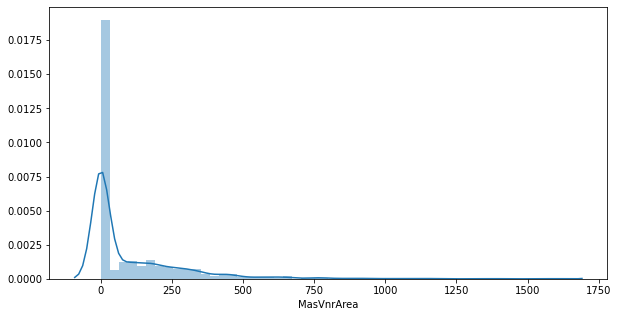

In [44]:
#Inspecting variables MasVnrArea
plt.figure(figsize=(10,5))
sns.distplot(house_price_df['MasVnrArea'])
plt.show()

We see that the distribution for MasVnrArea is Right skewed 

In [45]:
#checking summary statistics for MasVnrArea
house_price_df['MasVnrArea'].describe()

count    1450.000000
mean      103.524828
std       181.117506
min         0.000000
25%         0.000000
50%         0.000000
75%       165.750000
max      1600.000000
Name: MasVnrArea, dtype: float64

Since the distribution is skewed ,imputing missing values with median=0

In [46]:
#imputing missing values for MasVnrArea
house_price_df['MasVnrArea'].fillna(house_price_df['MasVnrArea'].median(skipna=True),inplace=True)

In [47]:
#Inspecting variables MasVnrType
house_price_df['MasVnrType'].value_counts(dropna=False)

None       864
BrkFace    443
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [48]:
#inpecting row having missing values for MasVnrType
house_price_df[house_price_df['MasVnrType'].isnull()][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,0.0
528,NaN,0.0
649,NaN,0.0
935,NaN,0.0
971,NaN,0.0
975,NaN,0.0
1241,NaN,0.0
1276,NaN,0.0


Since MasVnrArea=0 for all MasVnrType=NaN,we can impute MasVnrType=NaN with MasVnrType=None

In [49]:
#imputing missing values for MasVnrType
house_price_df['MasVnrType'].fillna(house_price_df['MasVnrType'].value_counts().idxmax(),inplace=True)

In [50]:
# inspecting Electrical
print("No of missing records {}".format(house_price_df['Electrical'].isnull().sum()))
house_price_df[house_price_df['Electrical'].isnull()]

No of missing records 1


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1377,80,RL,73.0,9735,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NA,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NA,0,5,2008,WD,Normal,167500


In [51]:
#check possible values for Electrical variable
house_price_df['Electrical'].value_counts(dropna=False)

SBrkr    1332
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

Impute missing values in 'Electrical' with most frequently occuring value : 'SBrkr'

In [52]:
#impute missing value in electrical
house_price_df['Electrical'].fillna(house_price_df['Electrical'].value_counts().idxmax(),inplace=True)

#### ******* completed Handling missing values *******

### 2.2 Handling incorrect datatypes

In [53]:
#checking column datatypes
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1458 non-null   int64  
 1   MSZoning       1458 non-null   object 
 2   LotFrontage    1458 non-null   float64
 3   LotArea        1458 non-null   int64  
 4   Street         1458 non-null   object 
 5   Alley          1458 non-null   object 
 6   LotShape       1458 non-null   object 
 7   LandContour    1458 non-null   object 
 8   Utilities      1458 non-null   object 
 9   LotConfig      1458 non-null   object 
 10  LandSlope      1458 non-null   object 
 11  Neighborhood   1458 non-null   object 
 12  Condition1     1458 non-null   object 
 13  Condition2     1458 non-null   object 
 14  BldgType       1458 non-null   object 
 15  HouseStyle     1458 non-null   object 
 16  OverallQual    1458 non-null   int64  
 17  OverallCond    1458 non-null   int64  
 18  YearBuil

In [54]:
#sagregate variables based on datatypes
#list of categorical variables
house_price_categorical = house_price_df.select_dtypes(include=['object']).columns.tolist()

In [55]:
#continuous variables
house_price_continuous =house_price_df.select_dtypes(include=['int64','float64']).columns.tolist()

In [56]:
#checking if datatypes of all categorical variables is correct
#get unique values for all categorical variables
def get_options(var):
    return house_price_df[var].value_counts(dropna=False)

for var in house_price_categorical:
    print(get_options(var))

RL         1149
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1452
Grvl       6
Name: Street, dtype: int64
NA      1367
Grvl      50
Pave      41
Name: Alley, dtype: int64
Reg    925
IR1    482
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1309
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1457
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1050
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1380
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    149
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     76
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Nei

All categorical variables have correct datatypes

MSSubClass


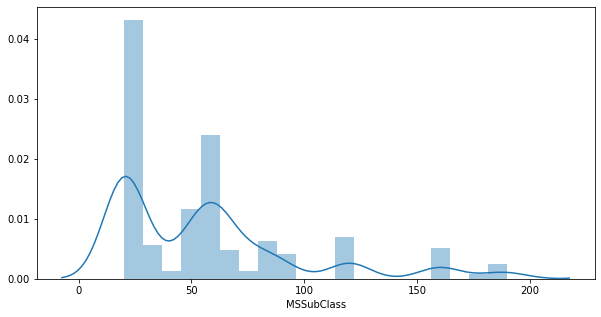


LotFrontage


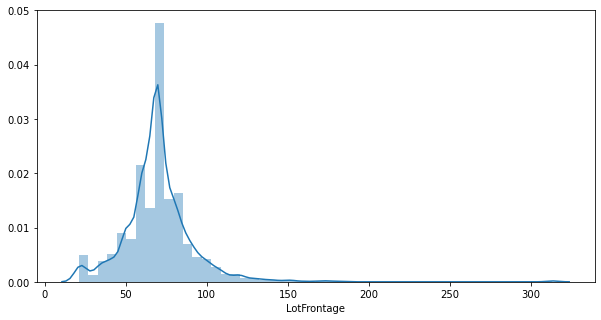


LotArea


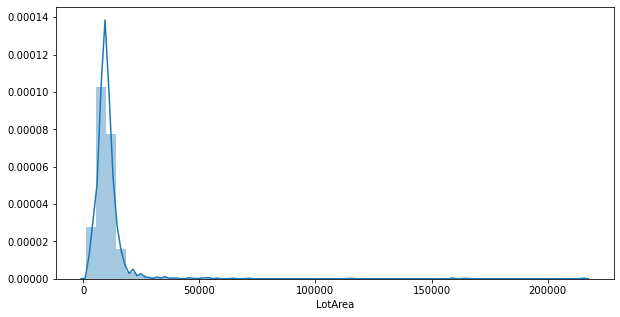


OverallQual


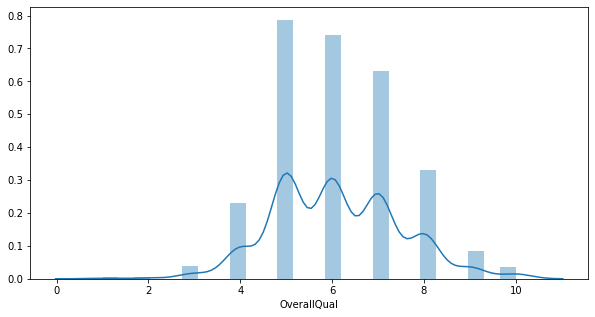


OverallCond


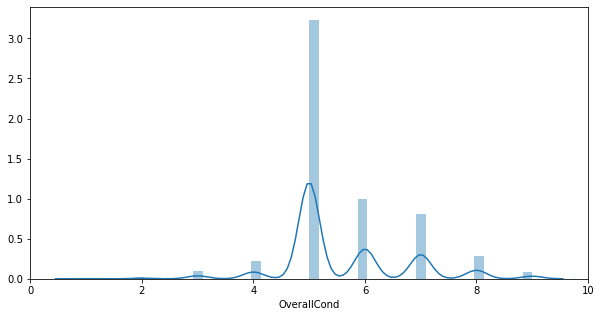


YearBuilt


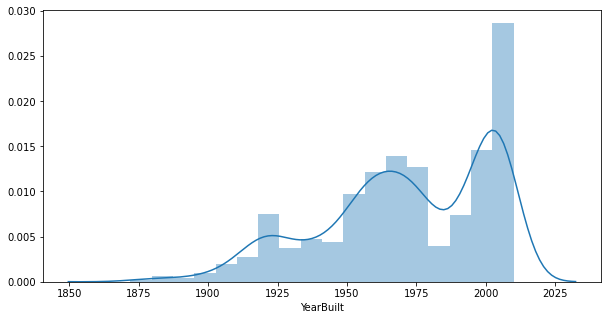


YearRemodAdd


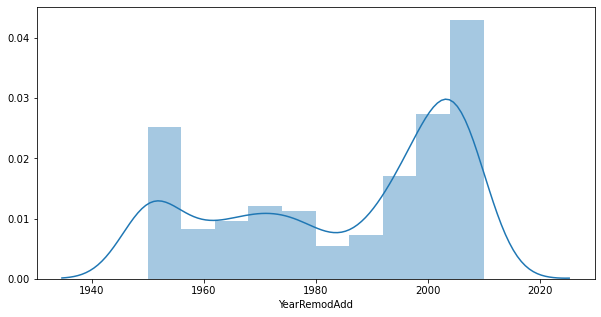


MasVnrArea


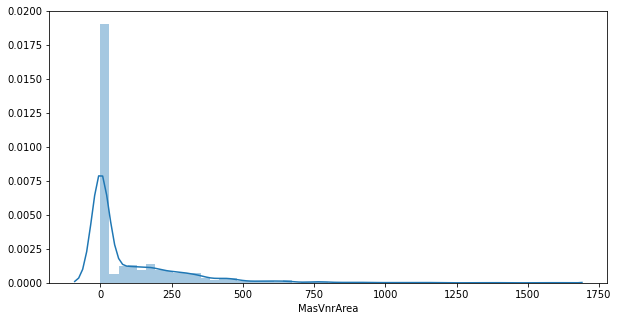


BsmtFinSF1


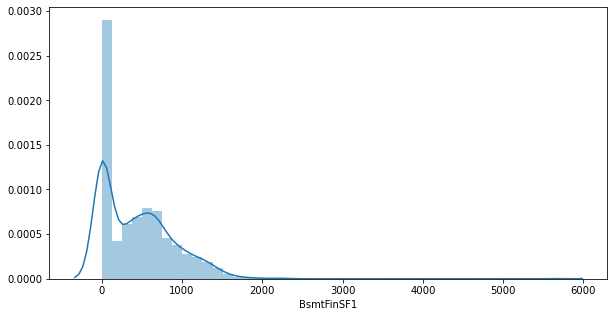


BsmtFinSF2


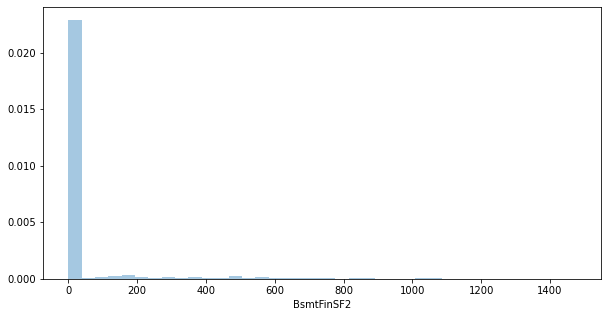


BsmtUnfSF


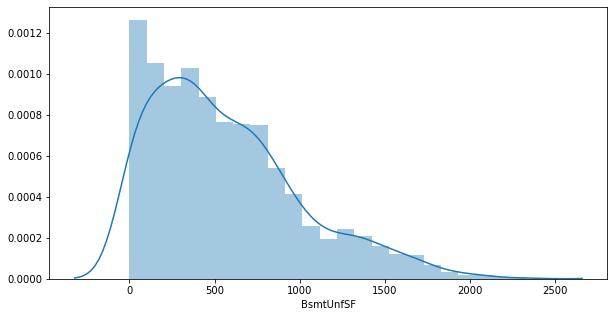


TotalBsmtSF


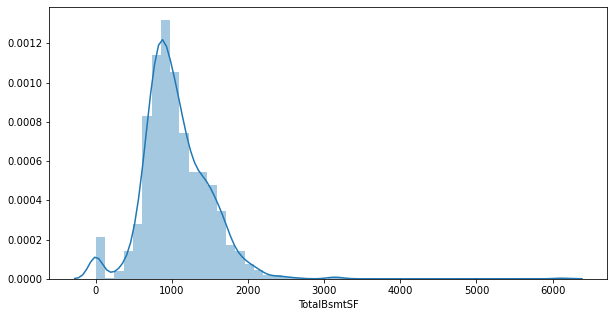


1stFlrSF


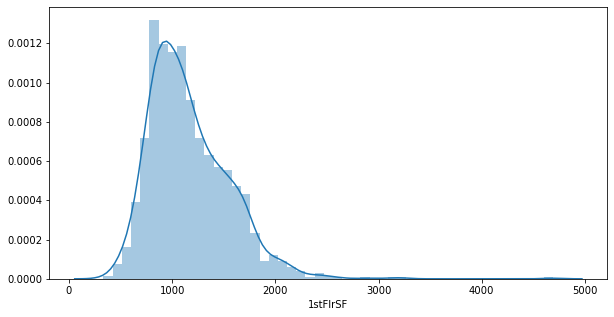


2ndFlrSF


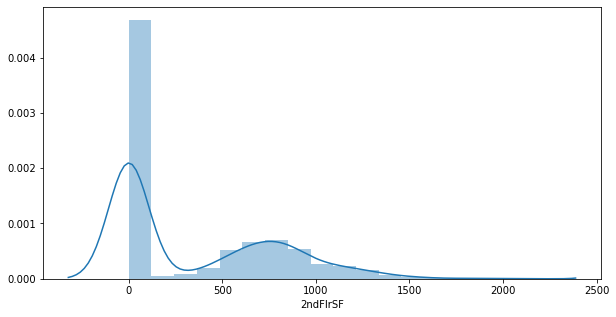


LowQualFinSF


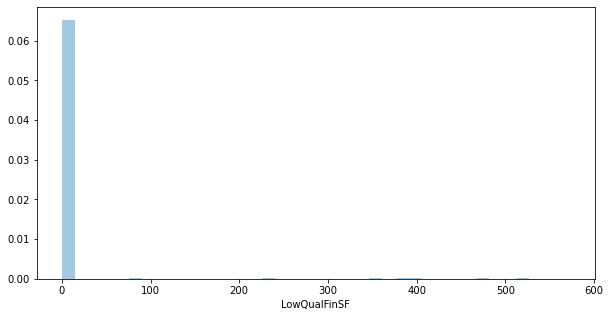


GrLivArea


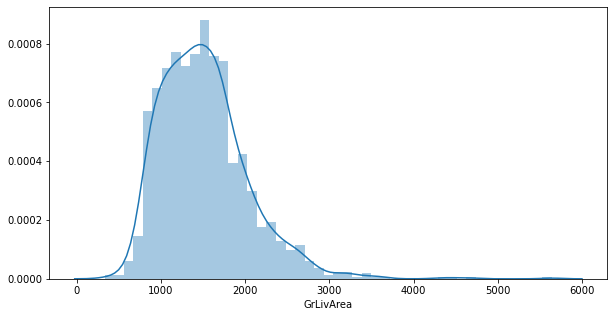


BsmtFullBath


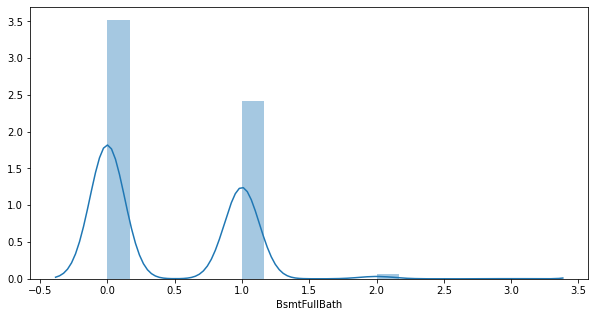


BsmtHalfBath


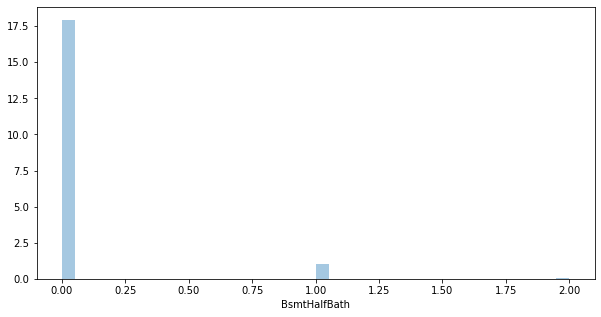


FullBath


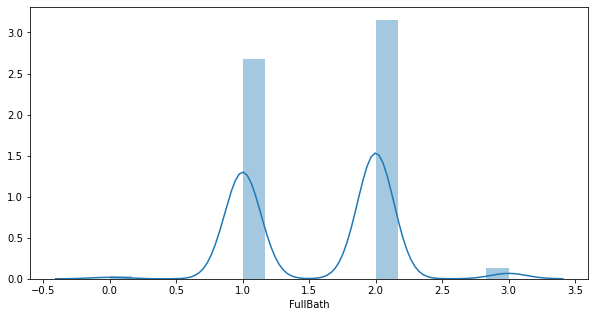


HalfBath


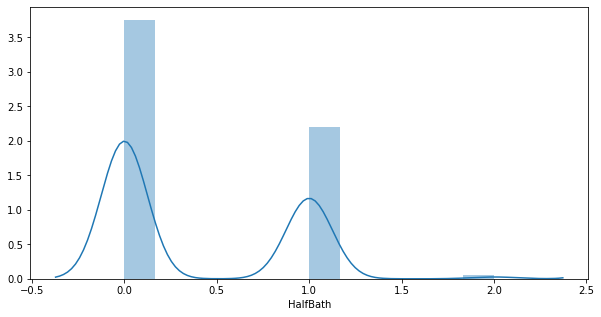


BedroomAbvGr


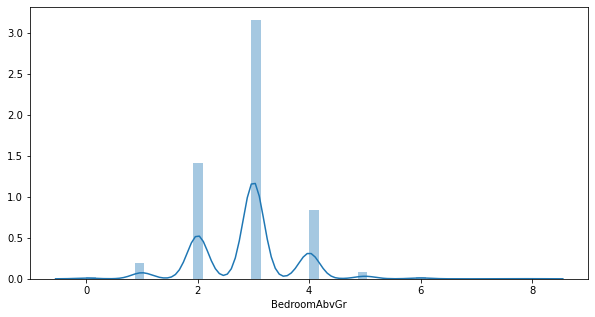


KitchenAbvGr


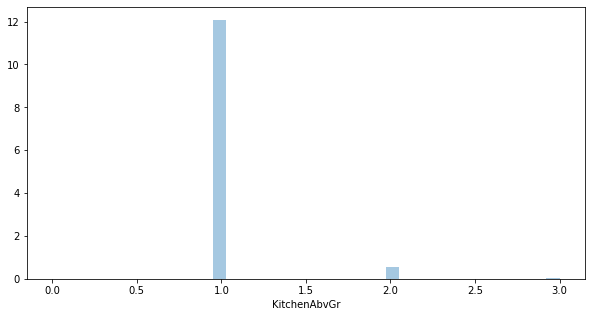


TotRmsAbvGrd


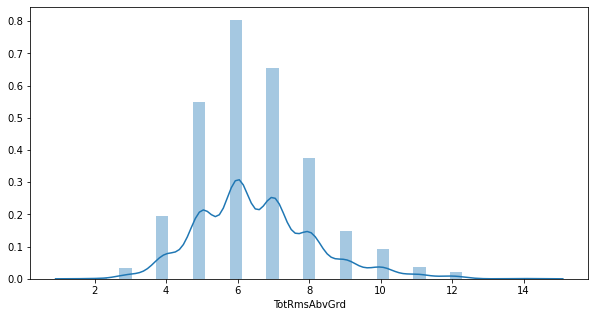


Fireplaces


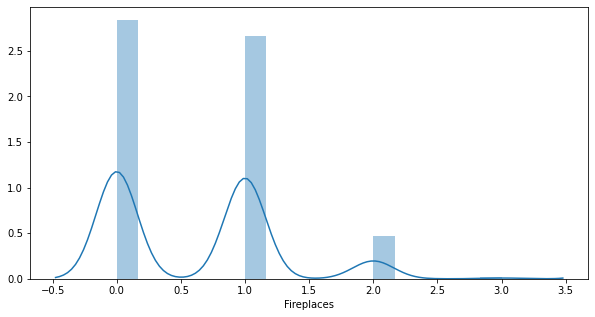


GarageYrBlt


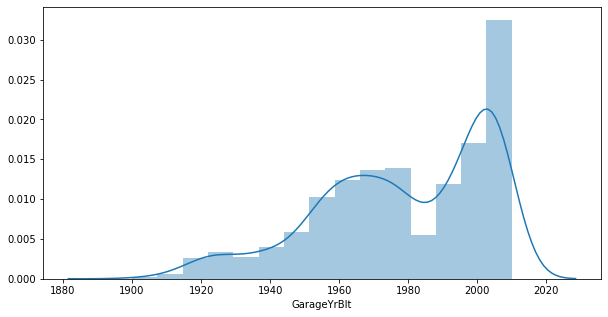


GarageCars


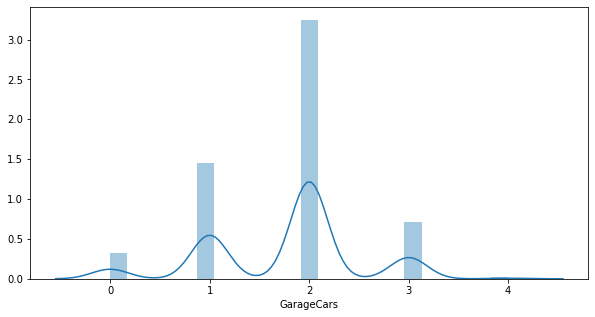


GarageArea


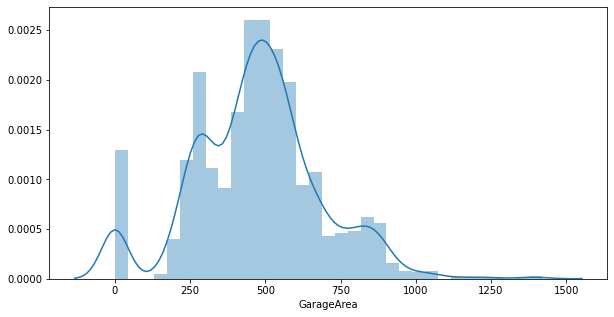


WoodDeckSF


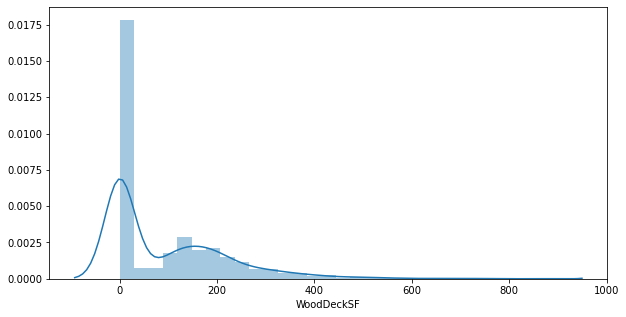


OpenPorchSF


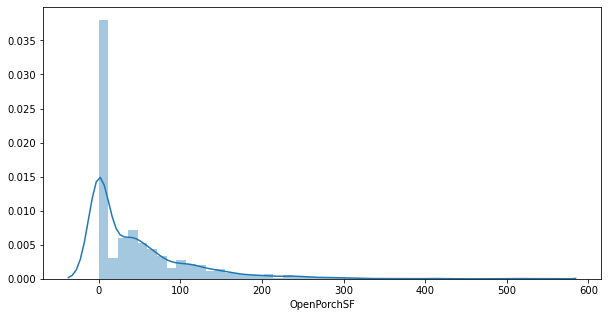


EnclosedPorch


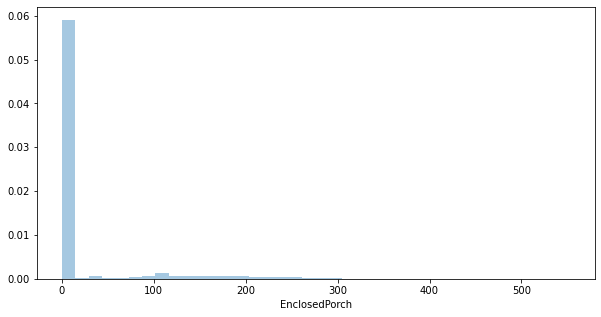


3SsnPorch


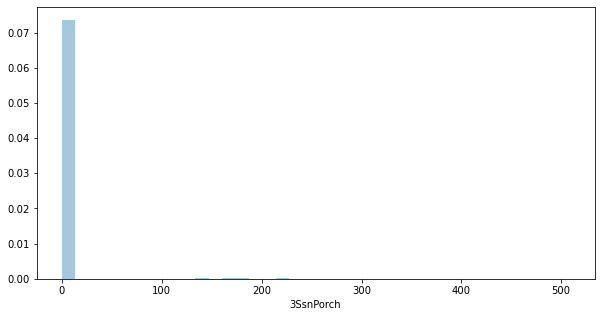


ScreenPorch


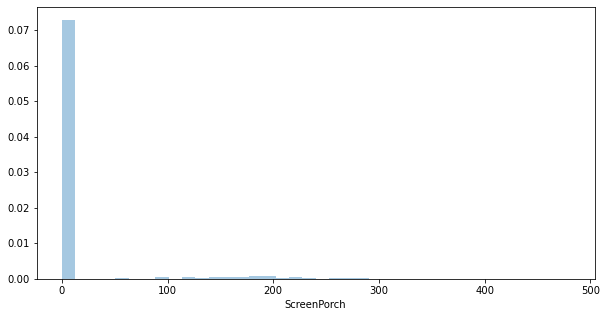


PoolArea


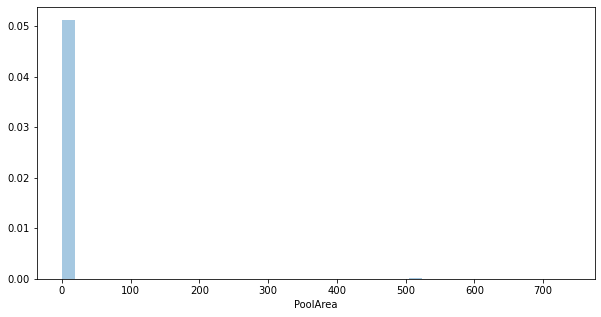


MiscVal


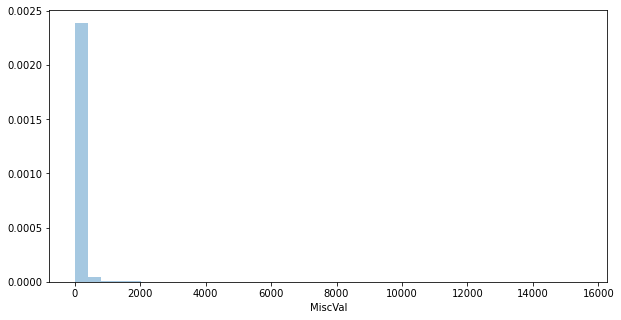


MoSold


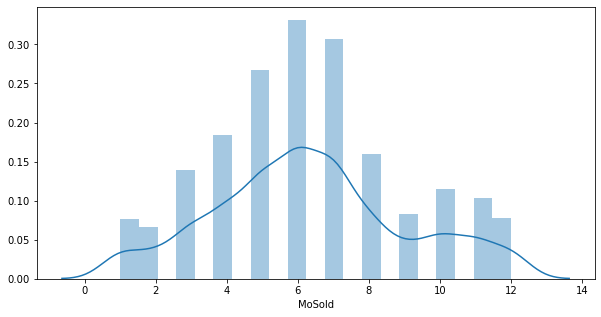


YrSold


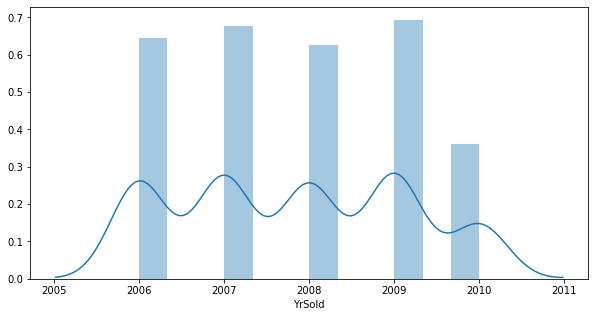


SalePrice


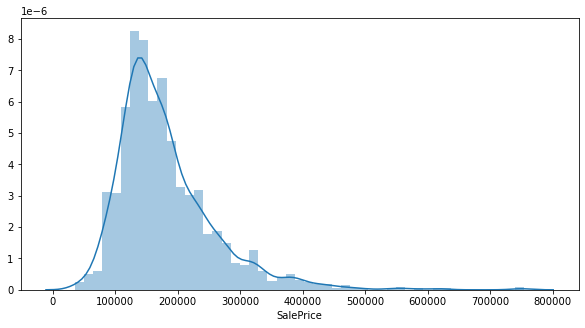

In [57]:
#checking if datatypes of all continuous variables is correct
#get distribution plot for all continuous variables
def get_plot(col):
    plt.figure(figsize=(10,5))
    sns.distplot(house_price_df[col])
    plt.show()
    return ''
    
#distribution plot for all continuous variables
for col in house_price_continuous:
    print(col)
    print(get_plot(col))

#### Observations from distribution plot for all continuous variables
1. MSSubClass:The distribution plot is not normally distributed.From the data dictionary we understand that MSSubClass identifies the type of dwelling involved in the sale,which implies its a categorical variable having numeric values.Therefore convert its type to object from int64
2. LotFrontage: Has skewed normal distribution,datatype float64 is valid
3. LotArea: Has normal distribution,datatype int64 is valid
4. OverallQual: The distribution plot is not normally distributed.From the data dictionary we understand that OverallQual rates the overall material and finish of the house,which implies its a categorical variable having numeric values.Therefore convert its type to object from int64
5. OverallCond: The distribution plot is not normally distributed.From the data dictionary we understand that OverallCond Rates the overall condition of the house,which implies its a categorical variable having numeric values.Therefore convert its type to object from int64
6. YearBuilt:The distribution plot is not normally distributed.YearBuilt gives us the Original construction date,therefore should be converted to datetime format
7. YearRemodAdd:The distribution plot is not normally distributed.YearRemodAdd gives us remodel date,therefore should be converted to datetime format
8. MasVnrArea:Has skewed normal distribution,datatype float64 is valid
9. BsmtFinSF1:Has skewed normal distribution,datatype float64 is valid
10. BsmtFinSF2:Maximum records have zero value,plot is skewed towards right.BsmtFinSF2 gives us Type 2 finished square feet area,therefore has proper datatype as float64
11. BsmtUnfSF:Has skewed normal distribution,datatype float64 is valid
12. TotalBsmtSF :Has skewed normal distribution,datatype float64 is valid
13. 1stFlrSF:Has skewed normal distribution,datatype int64 is valid
14. 2ndFlrSF : From the graph we observe that most houses dont have 2nd Floor.2ndFlrSF gives us Second floor square feet,and is a continuous variable
15. LowQualFinSF: gives us Low quality finished square feet,very few houses have Low quality finished square feet.continuous variable
16. GrLivArea : gives us  Above grade (ground) living area square feet,continuous variable
17. BsmtFullBath: gives us number of full bathrooms in Basement,this can be treated as categorical variable
18. BsmtHalfBath: gives us number of half bathrooms in Basement,this can be treated as categorical variable
19. FullBath: gives us Full bathrooms above grade,this can be treated as categorical variable
20. HalfBath: gives us half bathrooms above grade,this can be treated as categorical variable
21. BedroomAbvGr:gives us bedrooms above grade,this can be treated as categorical variable
22. KitchenAbvGr:gives us Kitchens above grade,this can be treated as categorical variable
23. TotRmsAbvGrd: gives us Total rooms above grade (does not include bathrooms),this can be treated as categorical variable
24. Fireplaces: Number of fireplaces,this can be treated as categorical variable
25. GarageYrBlt:Year garage was built,therefore should be converted to datetime format
26. GarageCars:Size of garage in car capacity,this can be treated as categorical variable
27. GarageArea :Size of garage in square feet,valid numeric variable
28. WoodDeckSF :Wood deck area in square feet,valid numeric variable
29. OpenPorchSF: Open porch area in square feet,valid numeric variable
30. EnclosedPorch:Enclosed porch area in square feet,valid numeric variable
31. 3SsnPorch: Three season porch area in square feet,valid numeric variable
32. ScreenPorch: Screen porch area in square feet,valid numeric variable
33. MoSold:Month Sold (MM),convert to categorical variable
34. YrSold:Year Sold (YYYY),convert to datetimeformat
35. SalePrice: Target Variable

In [58]:
#converting columns to categorical type (object type) : 
#MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,
#BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,MoSold,GarageCars
house_price_df[['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','MoSold','GarageCars']] = house_price_df[['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','MoSold','GarageCars']].astype('object')

In [59]:
#converting columns to datetime type : 
#YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
house_price_df['YearBuilt'] = pd.to_datetime(house_price_df['YearBuilt'], format='%Y')
house_price_df['YearRemodAdd'] = pd.to_datetime(house_price_df['YearRemodAdd'], format='%Y')
house_price_df['GarageYrBlt']  = pd.to_datetime(house_price_df['GarageYrBlt'],format='%Y')
house_price_df['YrSold'] = pd.to_datetime(house_price_df['YrSold'],format='%Y')

In [60]:
house_price_df['MoSold'].value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     88
11     79
9      63
12     59
1      58
2      51
Name: MoSold, dtype: int64

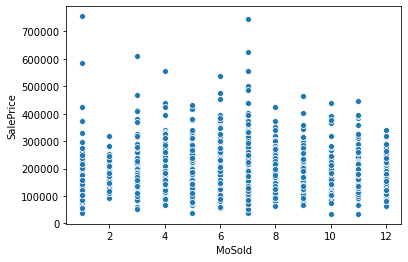

In [61]:
sns.scatterplot(x=house_price_df['MoSold'],y=house_price_df['SalePrice'])

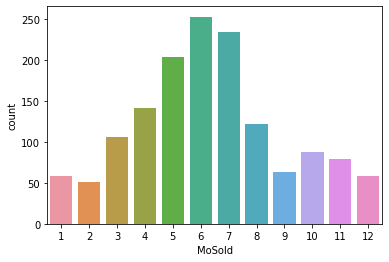

In [62]:
sns.countplot(house_price_df['MoSold'])

In [63]:
#drop house_price_df['MoSold'] as it varies randomlu with month of sold and also 
#we get this variable after a house is sold
house_price_df.drop(['MoSold'],axis=1,inplace=True)

In [64]:
#get final list of categorical variables
house_price_df_categorical_final = house_price_df.select_dtypes(include=['object']).columns.tolist()

In [65]:
#get final list of continuous variables
house_price_df_continuous_final = house_price_df.select_dtypes(include=['int64','float64']).columns.tolist()

### 2.3 Handling Outliers

LotFrontage


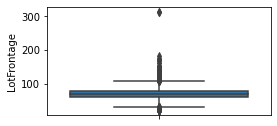


LotArea


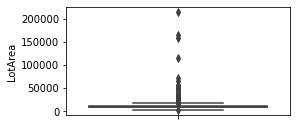


MasVnrArea


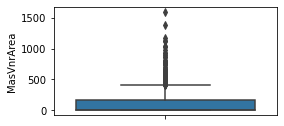


BsmtFinSF1


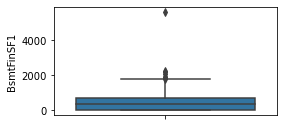


BsmtFinSF2


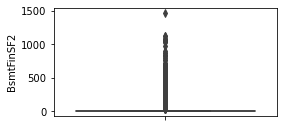


BsmtUnfSF


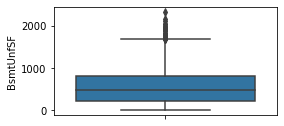


TotalBsmtSF


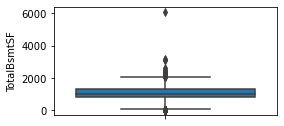


1stFlrSF


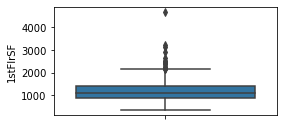


2ndFlrSF


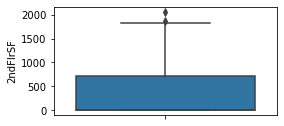


LowQualFinSF


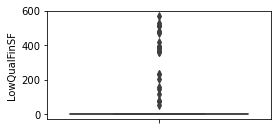


GrLivArea


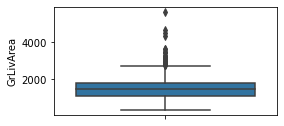


GarageArea


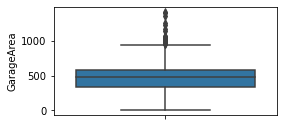


WoodDeckSF


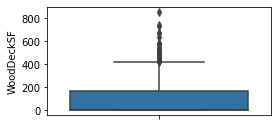


OpenPorchSF


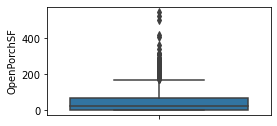


EnclosedPorch


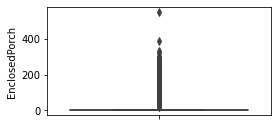


3SsnPorch


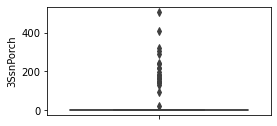


ScreenPorch


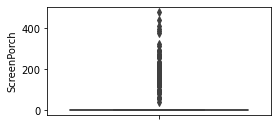


PoolArea


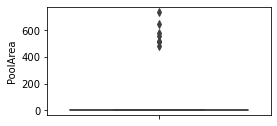


MiscVal


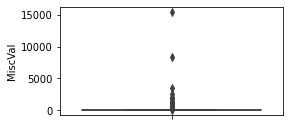


SalePrice


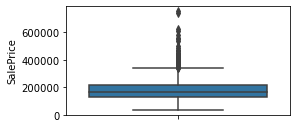

In [66]:
#plot box plots for all continuous variables
def get_boxplots(col):
    plt.figure(figsize=(4,2))
    sns.boxplot(y=house_price_df[col])
    plt.show()
    return ''
    
for col in house_price_df_continuous_final:
    print(col)
    print(get_boxplots(col))

From the above plot we observe that all the continous variables consists of large number of outliers.


### 3. EDA
###### 3.1 Univariate and Multivariate Analysis
###### 3. 2 Derived Matrix

### 3.1 Univariate and Multivariate Analysis

In [67]:
def get_eda_continuous(col_name):
    '''
        outputs two plots
        1)distribution for the individual variable
        2)scatter plot showing relationship of the predictor varibale with the
        SalePrice-target variable.
    '''
    fig, (ax1, ax2)= plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    
    #plot1 variable distribution
    sns.distplot(house_price_df[col_name],ax=ax1)
    ax1.set_title('Probability Distribution Plot')
    ax1.set_xlabel(col_name)
    
    #plot2 scatterplot
    sns.scatterplot(x=col_name,y='SalePrice',data=house_price_df,ax=ax2)
    ax2.set_title('Relationship with Target variable')
    ax2.set_xlabel(col_name)
    ax2.set_ylabel('SalePrice')

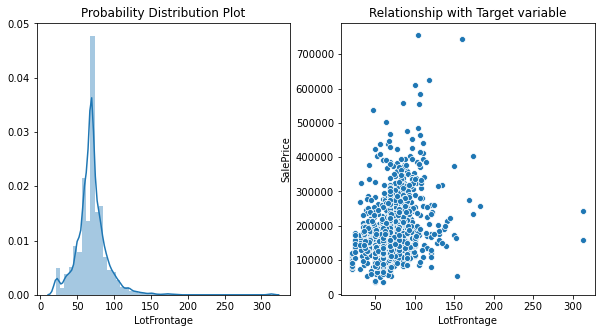

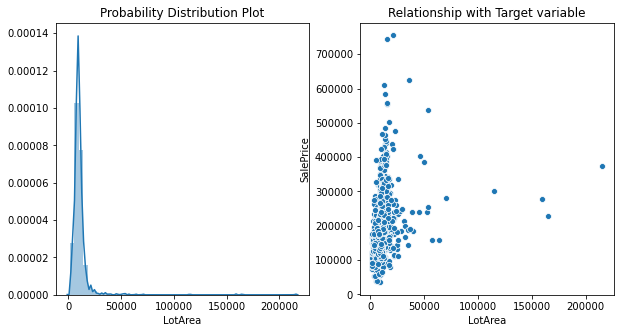

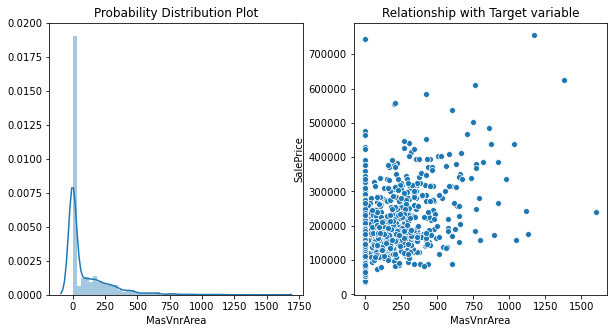

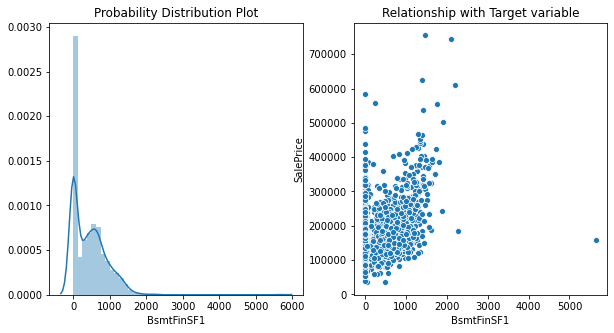

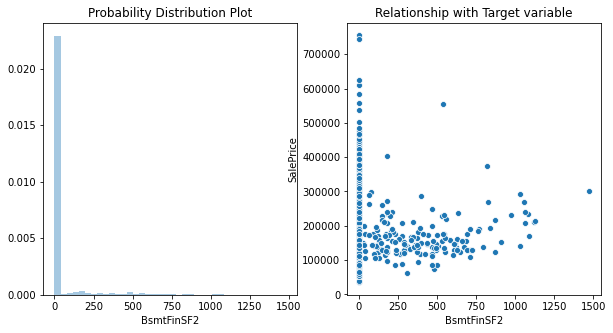

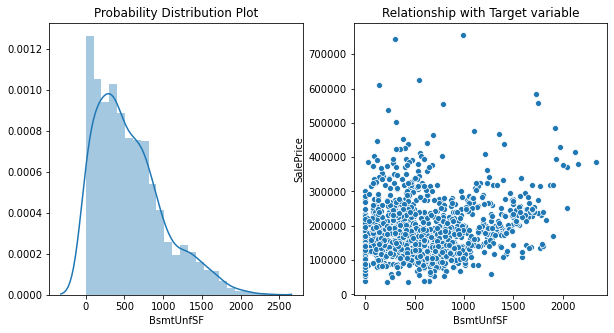

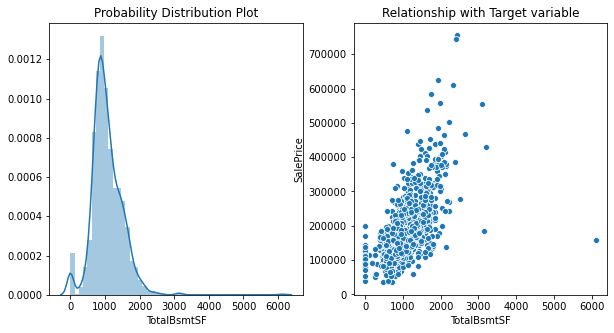

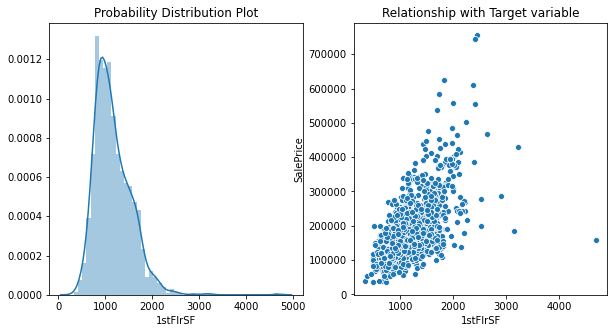

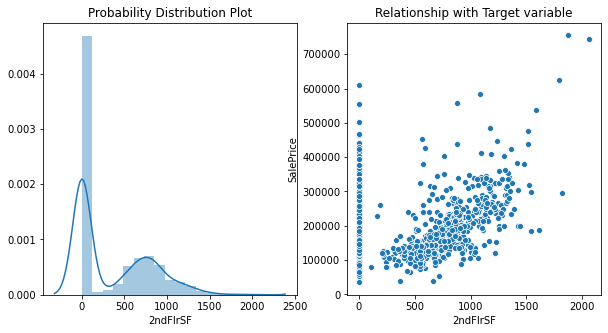

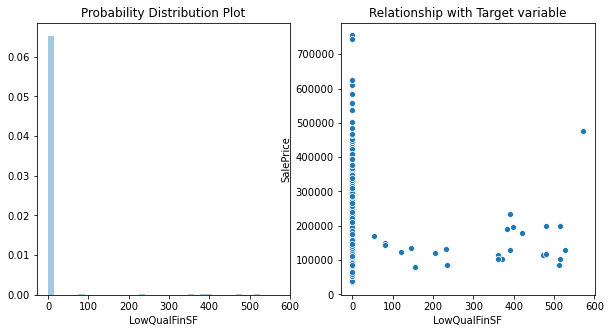

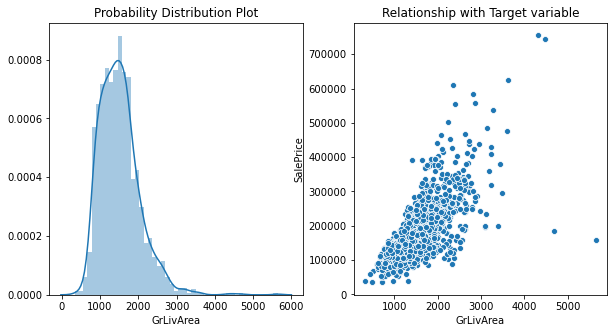

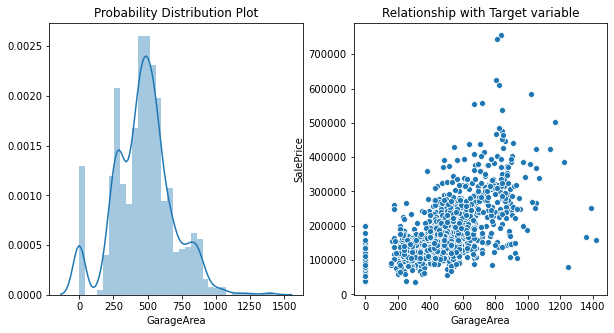

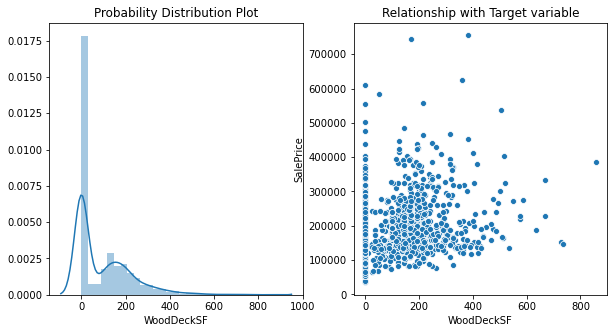

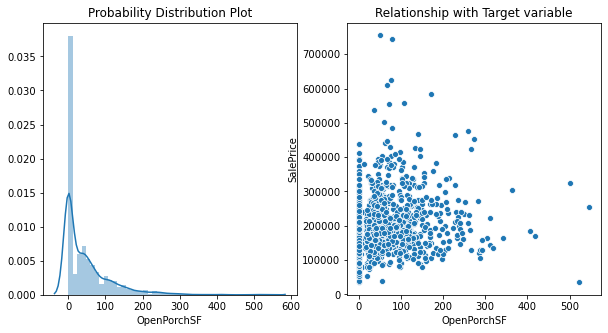

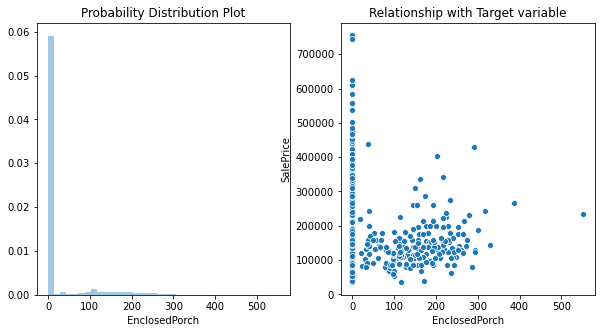

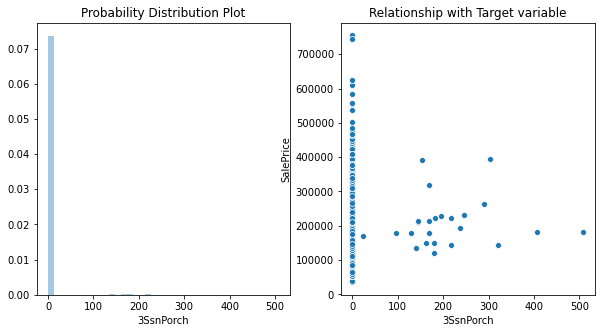

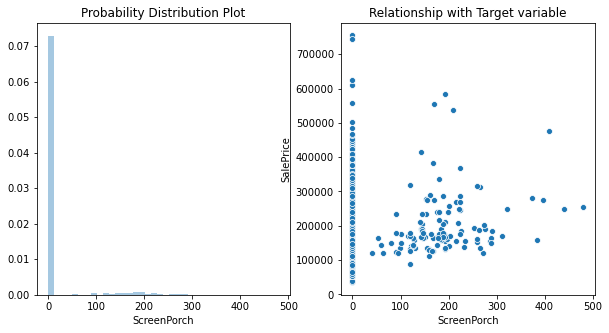

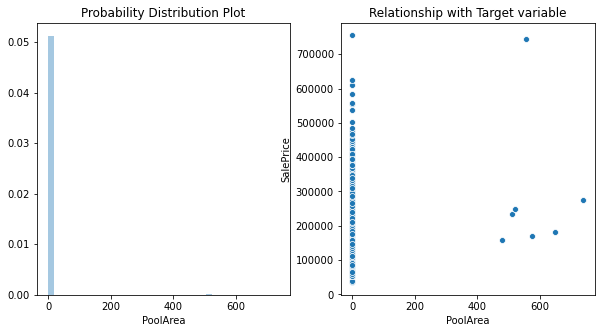

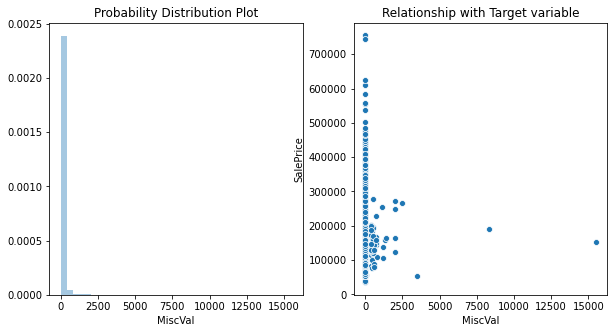

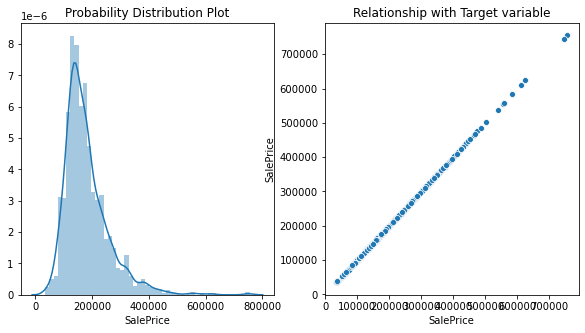

In [68]:
#univarite analysis for all continuous variables
for col_name in house_price_df_continuous_final:
    #print(col_name)
    get_eda_continuous(col_name)

In [69]:
#since maximum values for PoolArea and MiscVal are zero,we drop them
house_price_df.drop(['PoolArea','MiscVal'],axis=1,inplace=True)

In [70]:
#get final list of continuous variables
house_price_df_continuous_final = house_price_df.select_dtypes(include=['int64','float64']).columns.tolist()

In [71]:
def get_eda_categorical(col_name):
    '''
        outputs two plots
        1)countplot for individual variable
        2)Boxplot showing relationship of the predictor varibale with the
        SalePrice-target variable.
    '''
    fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    
    #plot1 countplot
    sns.countplot(house_price_df[col_name],ax=ax1)
    ax1.set_title('Countplot for predictor variable')
    ax1.set_xlabel(col_name)
    ax1.set_xlabel('Variable Count')
    
    #plot boxplot
    sns.boxplot(x=col_name,y='SalePrice',data=house_price_df,ax=ax2)
    ax2.set_title('Group wise SalePrice')
    ax2.set_xlabel(col_name)
    ax2.set_ylabel('SalePrice')

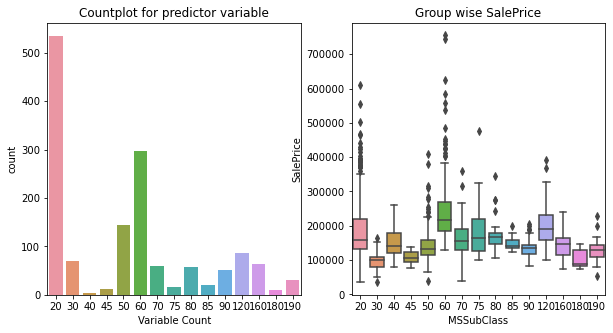

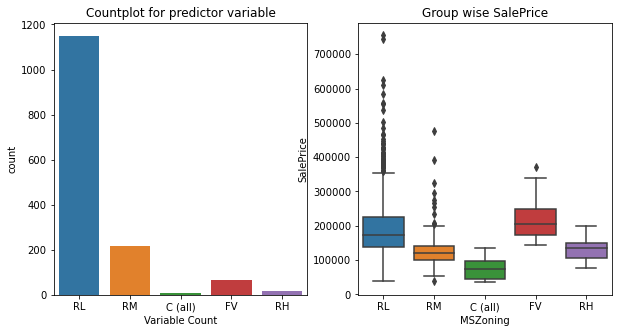

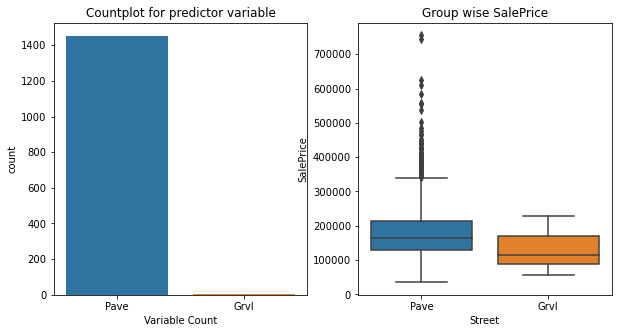

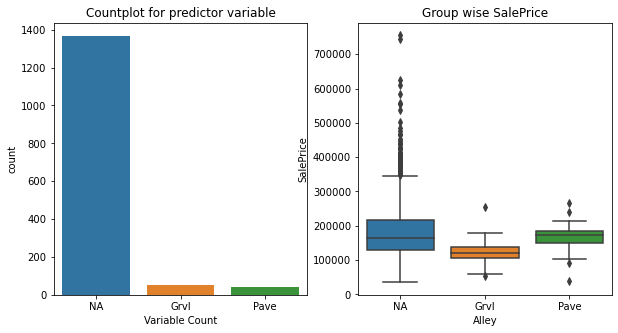

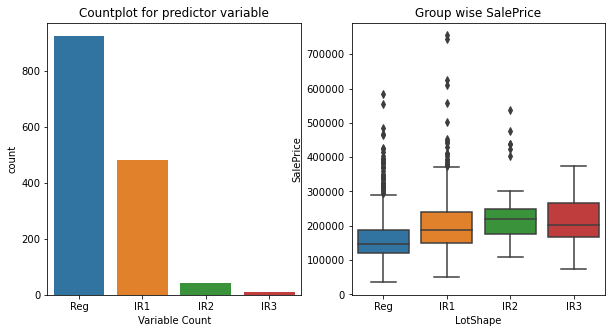

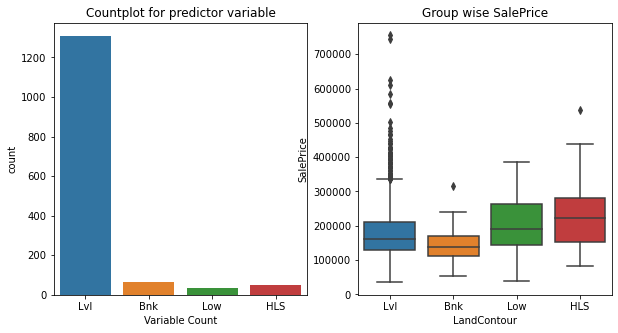

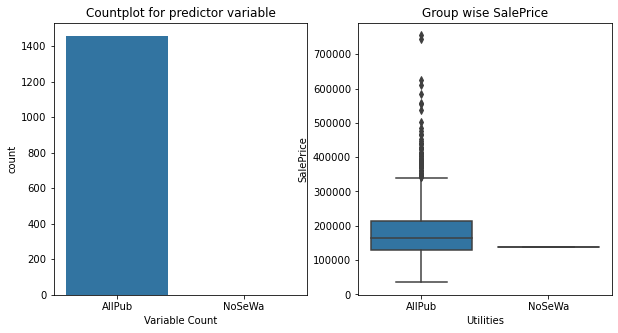

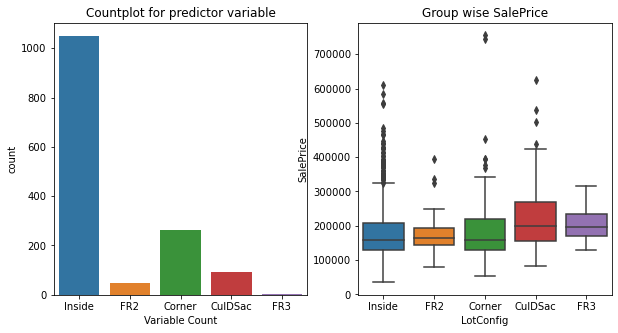

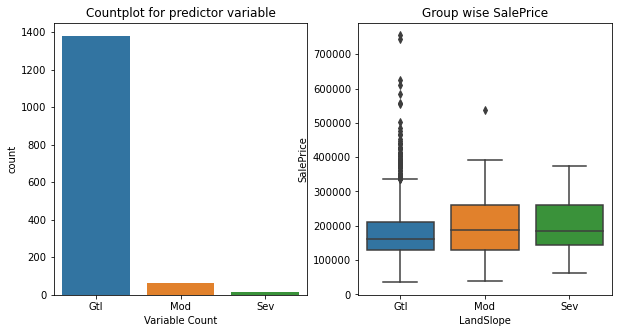

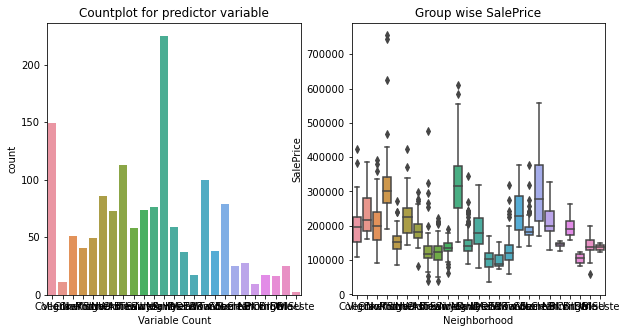

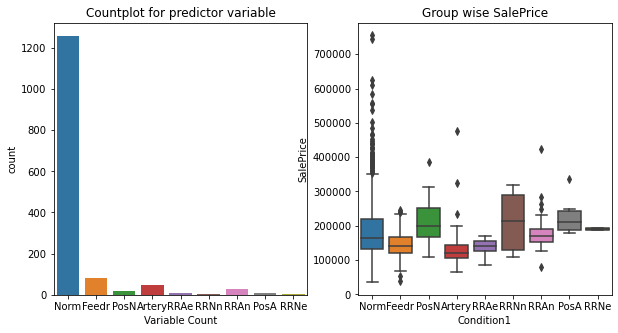

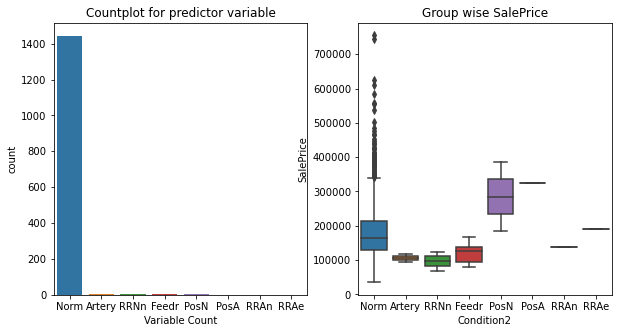

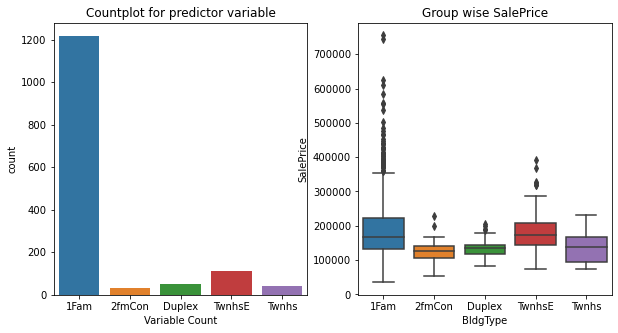

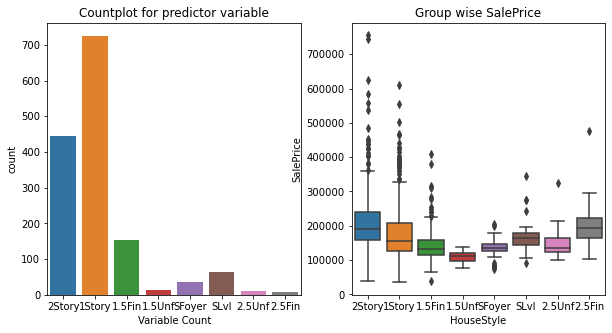

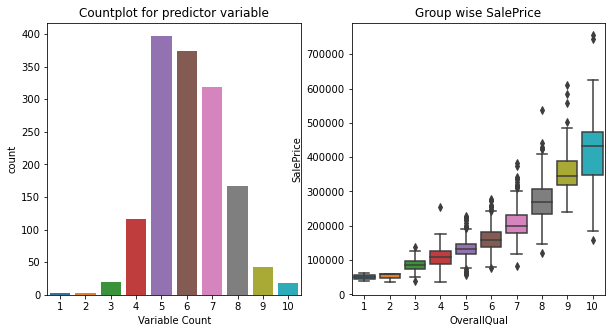

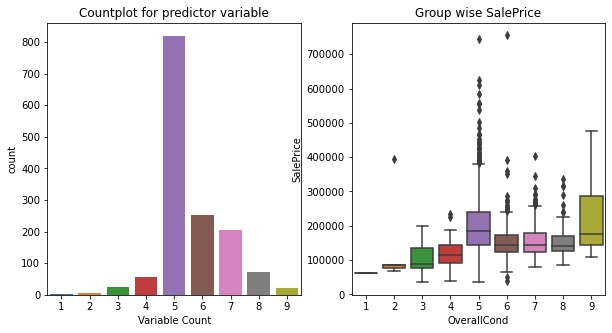

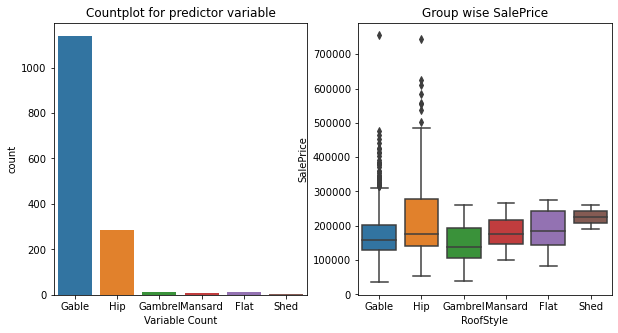

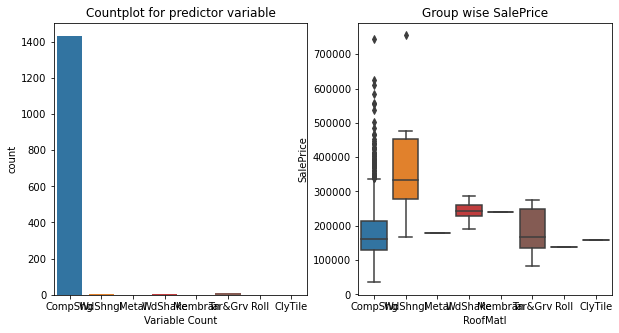

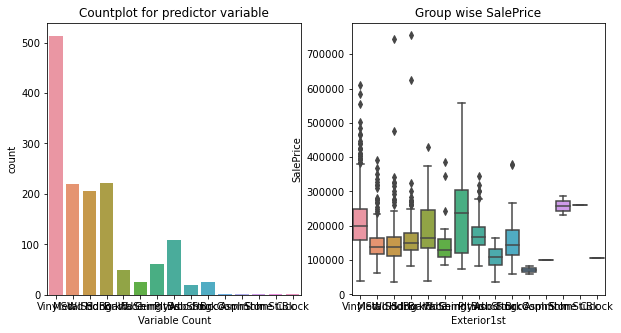

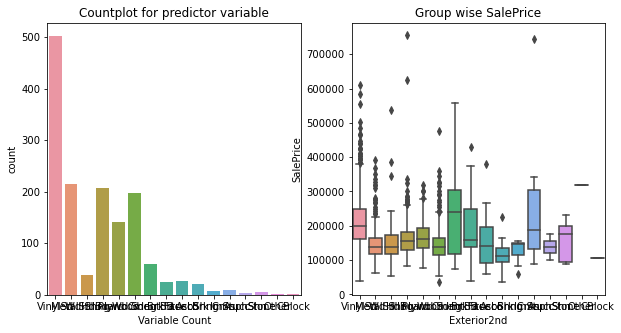

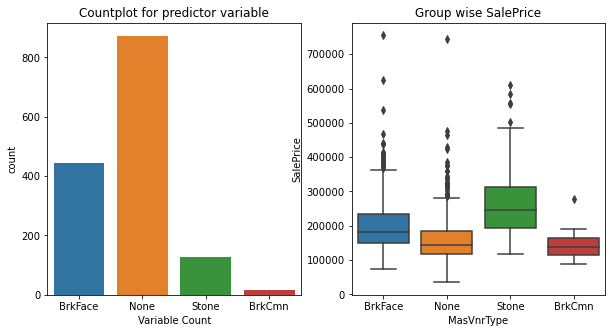

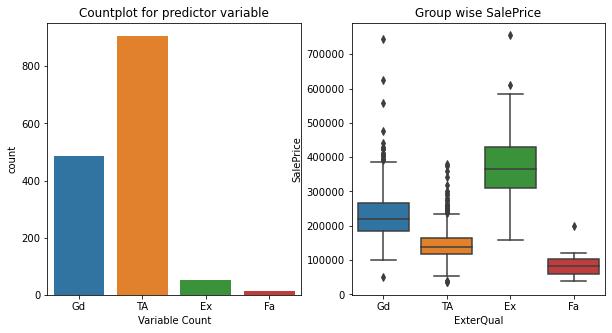

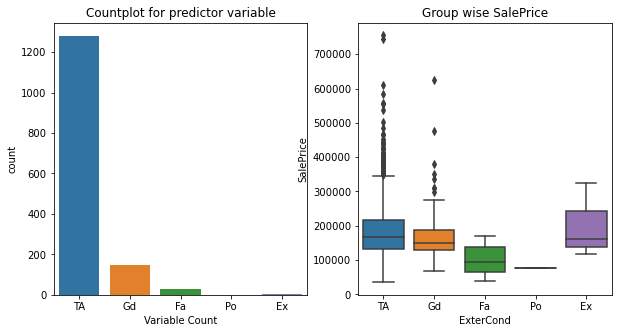

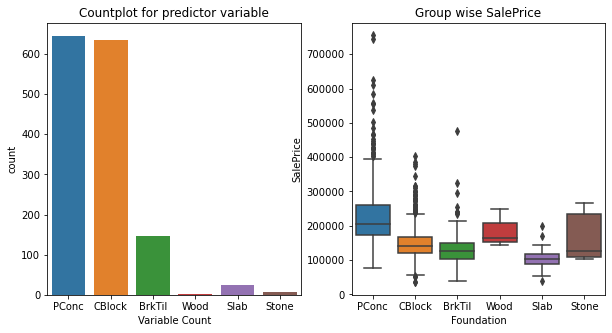

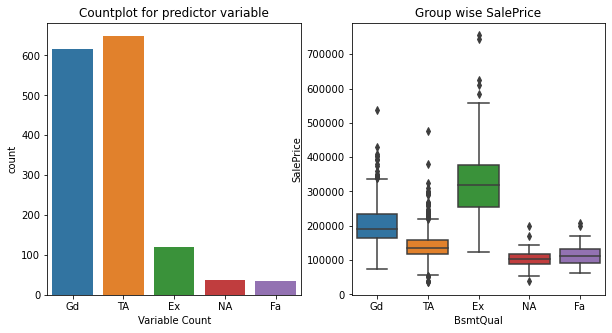

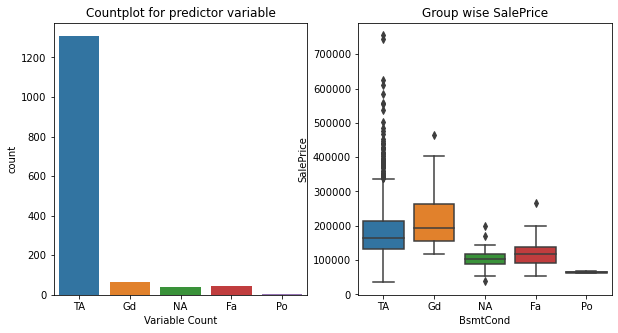

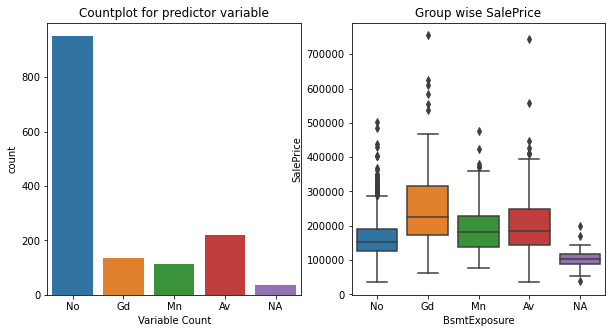

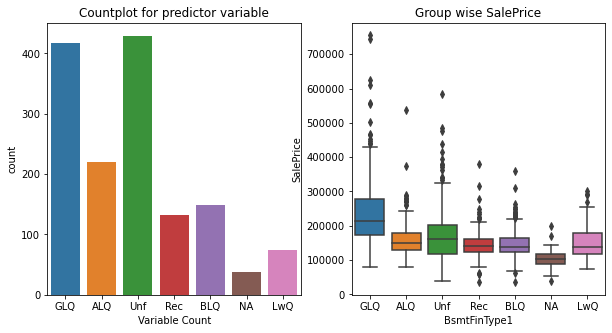

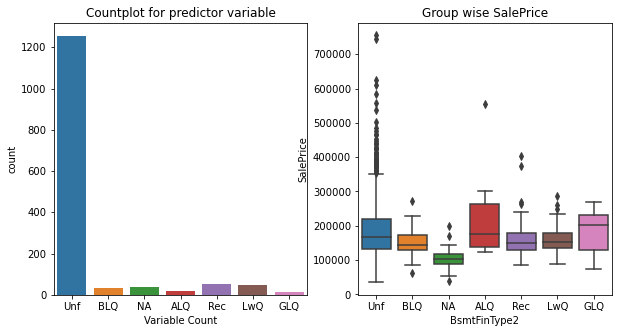

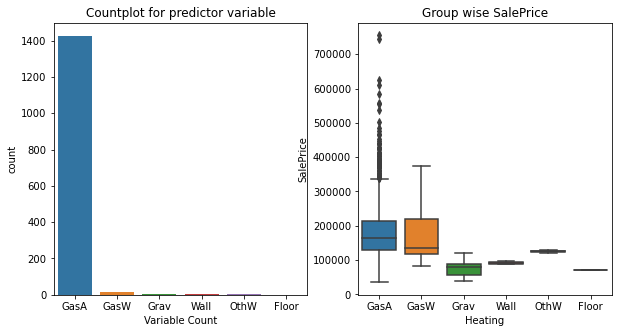

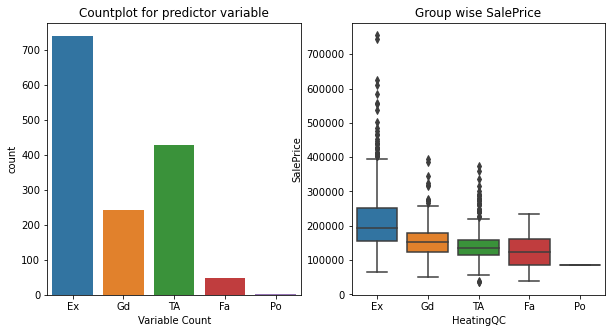

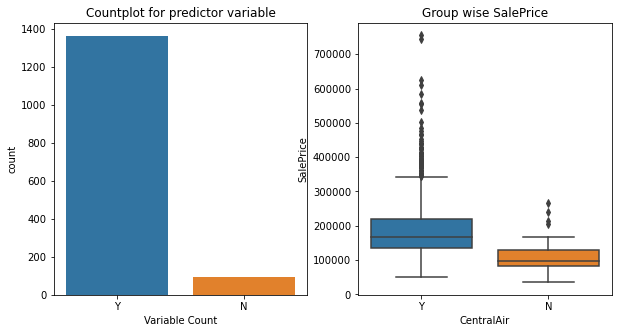

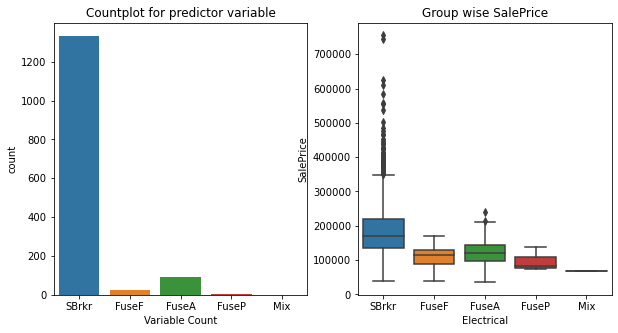

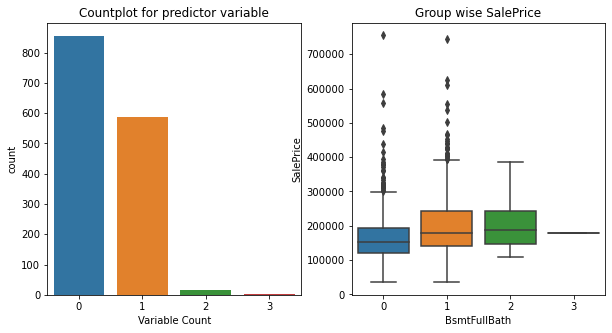

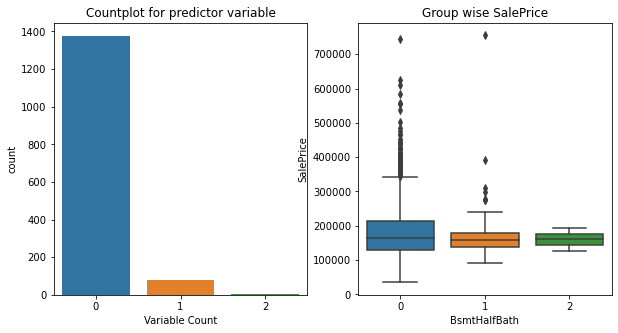

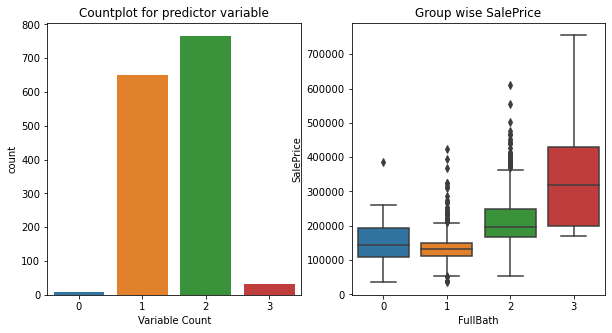

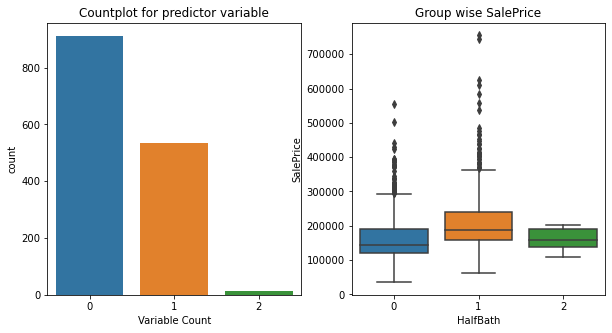

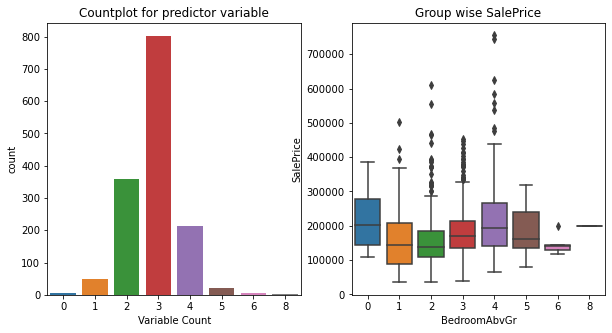

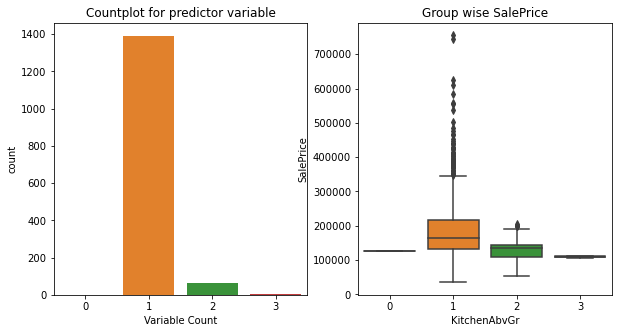

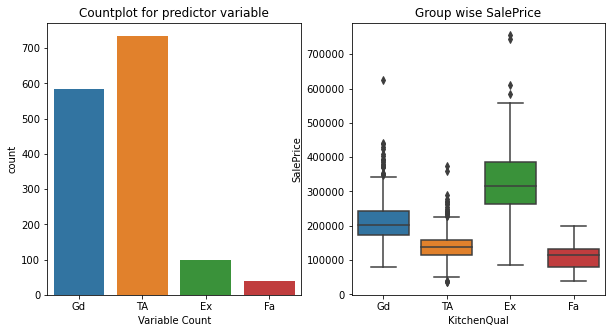

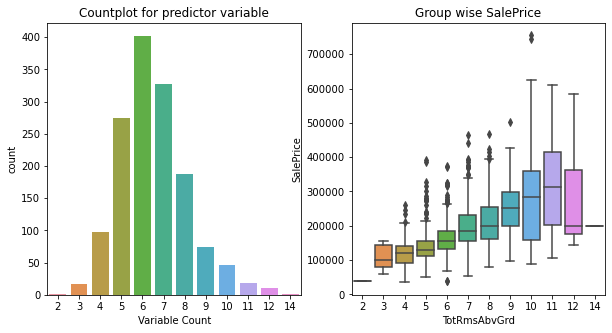

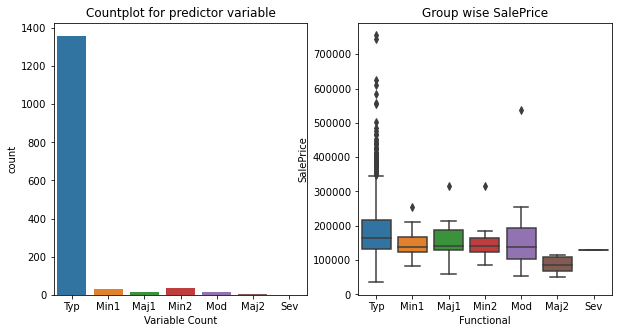

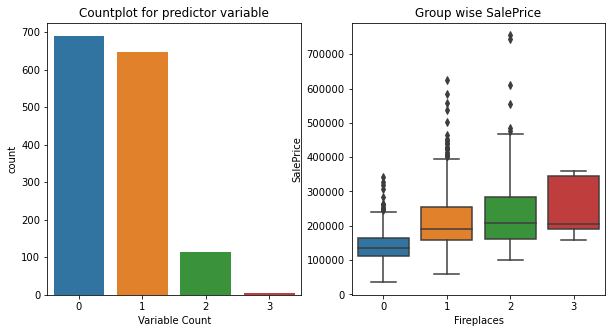

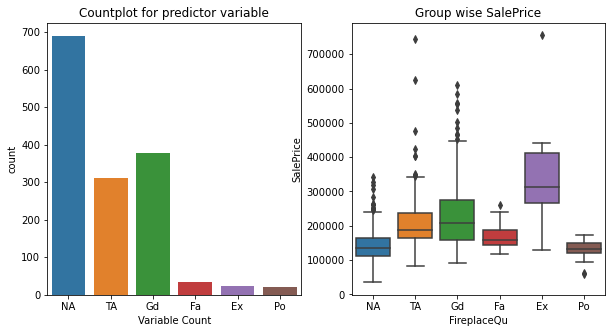

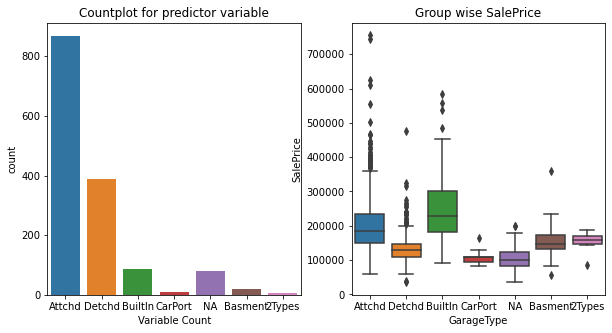

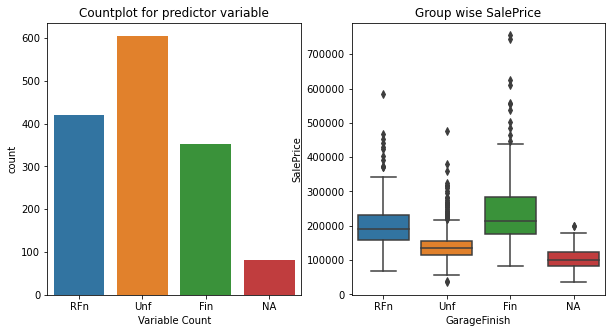

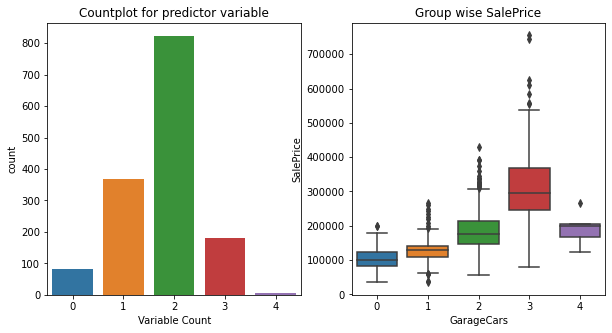

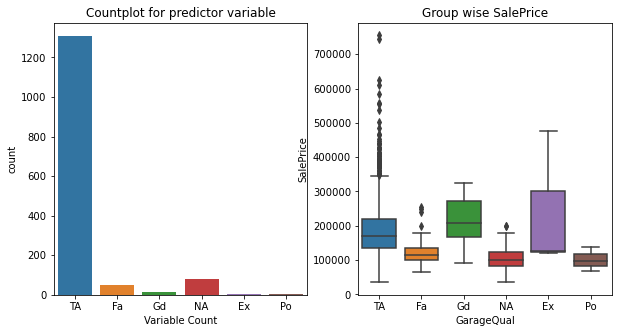

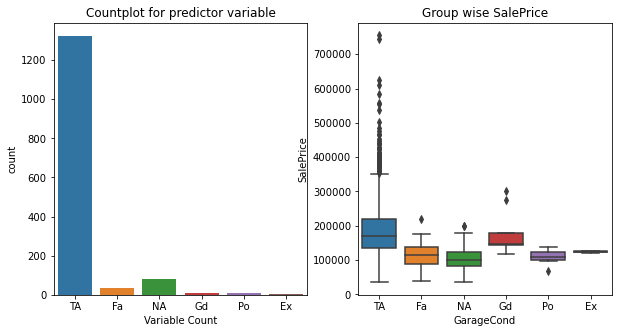

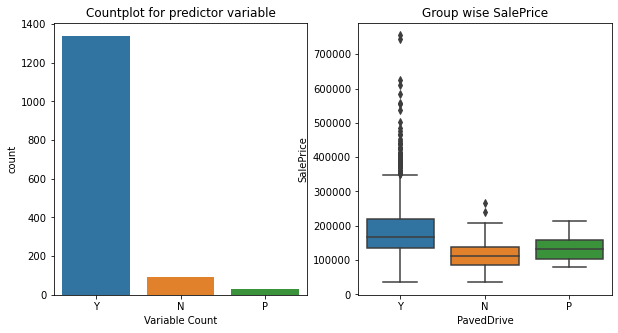

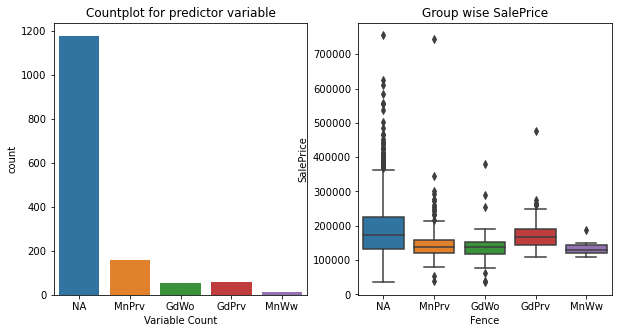

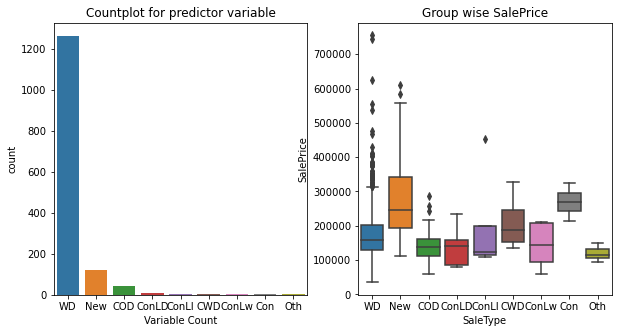

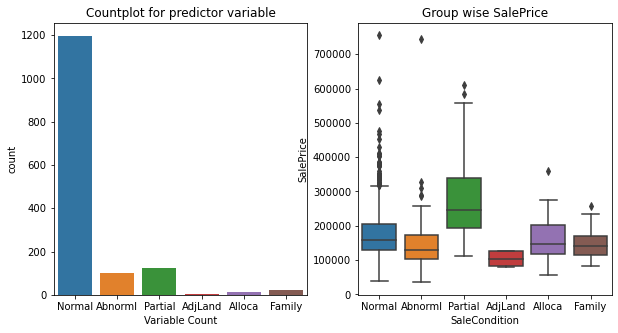

In [72]:
#univariate analysis for all categorical variables
for col_name in house_price_df_categorical_final:
    get_eda_categorical(col_name)

In [73]:
#Checking correlation between continuous variables
house_price_corr = house_price_df.corr()
house_price_corr

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice
LotFrontage,1.000000,0.304636,0.178104,0.213787,0.041267,0.123404,0.364205,0.413444,0.072994,0.037515,0.368083,0.323074,0.075989,0.137532,0.010405,0.061994,0.037750,0.334437
LotArea,0.304636,1.000000,0.103302,0.214564,0.111496,-0.002847,0.263043,0.299801,0.050758,0.004809,0.263033,0.180615,0.171660,0.084636,-0.018253,0.020453,0.043232,0.263961
MasVnrArea,0.178104,0.103302,1.000000,0.260705,-0.073461,0.112301,0.359651,0.339406,0.174391,-0.068550,0.388014,0.370101,0.160585,0.123023,-0.109642,0.019255,0.062516,0.472111
BsmtFinSF1,0.213787,0.214564,0.260705,1.000000,-0.053242,-0.498694,0.522092,0.444996,-0.135750,-0.064531,0.208528,0.295716,0.205614,0.113141,-0.102296,0.026521,0.062188,0.385835
BsmtFinSF2,0.041267,0.111496,-0.073461,-0.053242,1.000000,-0.214430,0.096793,0.095080,-0.097885,0.015042,-0.009965,-0.021807,0.069550,0.004547,0.037229,-0.029877,0.089543,-0.013777
BsmtUnfSF,0.123404,-0.002847,0.112301,-0.498694,-0.214430,1.000000,0.411924,0.317253,0.005114,0.028490,0.240160,0.180848,-0.004345,0.130034,-0.001758,0.021063,-0.012016,0.212886
TotalBsmtSF,0.364205,0.263043,0.359651,0.522092,0.096793,0.411924,1.000000,0.822687,-0.173177,-0.033139,0.458076,0.484888,0.236638,0.251946,-0.095135,0.038068,0.086063,0.614699
1stFlrSF,0.413444,0.299801,0.339406,0.444996,0.095080,0.317253,0.822687,1.000000,-0.201792,-0.014198,0.566451,0.489119,0.236444,0.212761,-0.065185,0.056189,0.088932,0.605565
2ndFlrSF,0.072994,0.050758,0.174391,-0.135750,-0.097885,0.005114,-0.173177,-0.201792,1.000000,0.063423,0.687754,0.139645,0.091531,0.207276,0.062117,-0.024347,0.040697,0.320324
LowQualFinSF,0.037515,0.004809,-0.068550,-0.064531,0.015042,0.028490,-0.033139,-0.014198,0.063423,1.000000,0.134756,-0.067529,-0.025479,0.018261,0.061028,-0.004315,0.026756,-0.025502


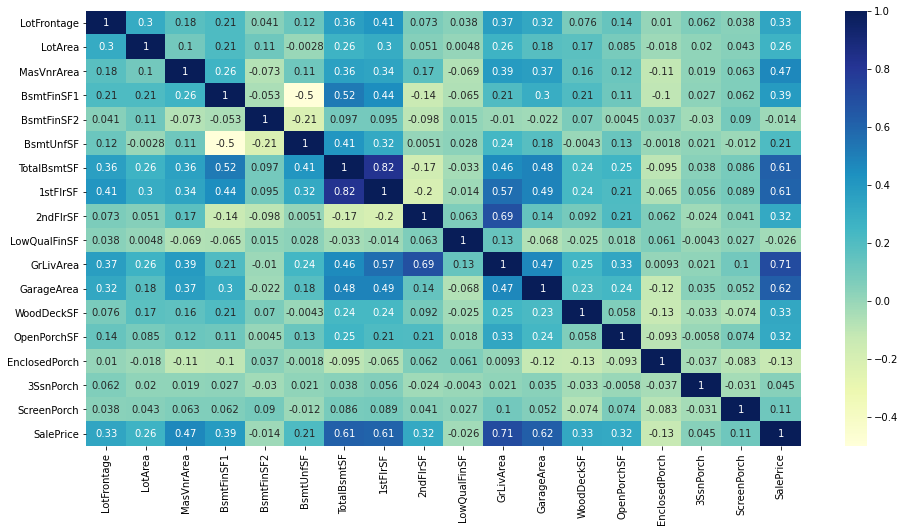

In [74]:
#heatmap
plt.figure(figsize=(16,8))
sns.heatmap(house_price_corr,annot=True,cmap='YlGnBu')
plt.show()

#### Observation from heatmap
 ##### SalePrice is positively correlated with the following variables
1. GrLivArea: Above grade (ground) living area square feet
2. GarageArea: Size of garage in square feet
3. TotalBsmtSF: Total square feet of basement area
4. 1stFlrSF: First Floor square feet

##### SalePrice is negatively correlated with the following variables
1. EnclosedPorch: Enclosed porch area in square feet
3. LowQualFinSF: Low quality finished square feet (all floors)

###### Multicollinearity
We observer multicollinearity among below pairs:-
1. TotalBsmtSF and 1stFlrSF
2. BsmtFinSF1 and TotalBsmtSF
3. BsmtFinSF1 and BsmtUnfSF
4. 1stFlrSF and GrLivArea


### 3. 2 Derived Matrix

In [75]:
#creating a variable to check if house was remodified or not
#house_remod = 1 if YearRemodAdd-YearBuilt>0
house_price_df['house_remod'] = np.where(house_price_df['YearRemodAdd']>house_price_df['YearBuilt'],1,0)

In [76]:
#construction_age in years :creating a variable to check how old the house was when it was sold
house_price_df['construction_age'] = (house_price_df['YrSold']-house_price_df['YearBuilt'])/365
#extracting number of years from timedelta object
house_price_df['construction_age'] = house_price_df['construction_age'].astype('str')
house_price_df['construction_age'] = house_price_df['construction_age'].apply(lambda x:x.split(' ')[0])
#converting to type int
house_price_df['construction_age'] = house_price_df['construction_age'].astype('int32')

In [77]:
#converting construction_age into groups - 'new_construction,moderate_1,moderate_2,old_construction'
def get_group_construction(val):
    if (val>=0 and val<10):
        return 'new_construction'
    elif (val>=10 and val<20):
        return 'moderate_construction_1'
    elif (val>=20 and val<50):
        return 'moderate_construction_2'
    elif (val>=50):
        return 'old_construction'

house_price_df['construction_age'] = house_price_df['construction_age'].apply(lambda x:get_group_construction(x))

In [78]:
#converting YearBuilt into groups - 'recent_yrbuilt,medium_yrbuilt,old_yrbuilt'
def get_group_yrbuilt(val):
    if (val<1960):
        return 'old_yrbuilt'
    elif (val>=1960 and val<2000):
        return 'medium_yrbuilt'
    elif (val>=2000):
        return 'recent_yrbuilt'

house_price_df['YearBuilt_type'] = house_price_df['YearBuilt'].apply(lambda x:get_group_yrbuilt(x.year))

In [79]:
#get final list of categorical variables
house_price_df_categorical_final = house_price_df.select_dtypes(include=['object']).columns.tolist()
#get final list of continuous variables
house_price_df_continuous_final = house_price_df.select_dtypes(include=['int64','float64']).columns.tolist()

In [80]:
print("Total number of categorical variables are {} and continuous variables are {}".format(len(house_price_df_categorical_final),len(house_price_df_continuous_final)))

Total number of categorical variables are 55 and continuous variables are 18


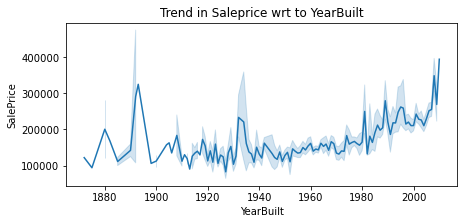

In [81]:
# checking trend in saleprice wrt to YearBuilt
plt.figure(figsize=[7,3])
sns.lineplot(x='YearBuilt',y='SalePrice',data=house_price_df)
plt.title('Trend in Saleprice wrt to YearBuilt')
plt.show()

We observe that saleprice is higher for new houses ,except for houses built between 1880 to 1990

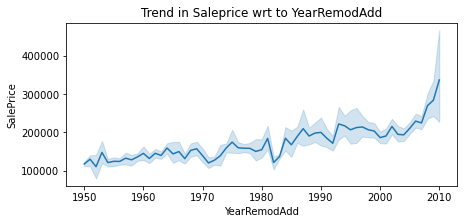

In [82]:
# checking trend in saleprice wrt to YearRemodAdd
plt.figure(figsize=[7,3])
sns.lineplot(x='YearRemodAdd',y='SalePrice',data=house_price_df)
plt.title('Trend in Saleprice wrt to YearRemodAdd')
plt.show()

We observe that SalePrice is higher for recently remodified houses

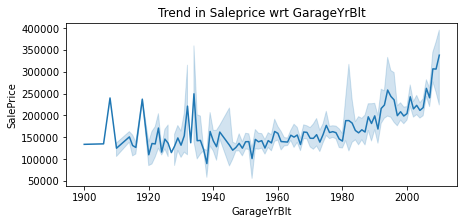

In [83]:
# checking trend in saleprice wrt GarageYrBlt
plt.figure(figsize=[7,3])
sns.lineplot(x='GarageYrBlt',y='SalePrice',data=house_price_df)
plt.title('Trend in Saleprice wrt GarageYrBlt')
plt.show()

In [84]:
#Drop datetime variables as we have created derived variables using them 
house_price_df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True)

##### ******* EDA completed *******

### 4. Data Preparation
 ##### 4.1 Create dummies for categorical variables
 ##### 4.2 Train - Test split
 ##### 4.3 Scaling
  ##### 4.4 Split dataset into X and y

### 4.1 Create dummies for categorical variables

In [85]:
#subset of all categorical variables
house_price_df[house_price_df_categorical_final]

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,construction_age,YearBuilt_type
0,60,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,RFn,2,TA,TA,Y,NA,WD,Normal,new_construction,recent_yrbuilt
1,20,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,NA,WD,Normal,moderate_construction_2,medium_yrbuilt
2,60,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,NA,WD,Normal,new_construction,recent_yrbuilt
3,70,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,NA,WD,Abnorml,old_construction,old_yrbuilt
4,60,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,NA,WD,Normal,new_construction,recent_yrbuilt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,60,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,NA,WD,Normal,new_construction,medium_yrbuilt
1454,20,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,Unf,2,TA,TA,Y,MnPrv,WD,Normal,moderate_construction_2,medium_yrbuilt
1455,70,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,RFn,1,TA,TA,Y,GdPrv,WD,Normal,old_construction,old_yrbuilt
1456,20,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,1,0,1,0,2,1,Gd,5,Typ,0,NA,Attchd,Unf,1,TA,TA,Y,NA,WD,Normal,old_construction,old_yrbuilt


In [86]:
# convert into dummy variables - one hot encoding
house_price_dummies = pd.get_dummies(house_price_df[house_price_df_categorical_final],drop_first=True)
house_price_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,Gar

In [87]:
print('Total number of dummy variables created are : {}'.format(house_price_dummies.shape[1]))

Total number of dummy variables created are : 290


In [88]:
#drop categorical variables
house_price_df.drop(house_price_df_categorical_final,axis=1,inplace=True)

In [89]:
#concat dummy variables with house_price_df
house_price_df = pd.concat([house_price_df,house_price_dummies],axis=1)

In [90]:
print('Total number of predictor variables after creating dummies are : {}'.format(house_price_df.shape[1]))

Total number of predictor variables after creating dummies are : 309


### 4.3 Train - Test split

In [91]:
#train test split
train_model, test_model = train_test_split(house_price_df,train_size=0.7,test_size=0.3,random_state=99) 

In [92]:
#inspecting train and test data
print(train_model.shape)
print(test_model.shape)

(1020, 309)
(438, 309)


### 4.4 Scaling the features

In [93]:
#scaling the data  for train_model :considering only the numeric variables inlucding target variable
scaler = MinMaxScaler()
train_model[house_price_df_continuous_final] = scaler.fit_transform(train_model[house_price_df_continuous_final])

In [94]:
#inspecting scaled values
train_model[house_price_df_continuous_final].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,0.167748,0.041785,0.064362,0.076960,0.029164,0.280410,0.172024,0.191073,0.194053,0.010676,0.226464,0.338488,0.128557,0.090757,0.040027,0.007683,0.035612,0.204668
std,0.077528,0.047468,0.114522,0.082189,0.105115,0.216687,0.073564,0.090491,0.235787,0.085272,0.101259,0.150323,0.171041,0.128213,0.112433,0.062883,0.132872,0.110054
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.133562,0.028454,0.000000,0.000000,0.000000,0.112414,0.128028,0.127123,0.000000,0.000000,0.151046,0.247884,0.000000,0.000000,0.000000,0.000000,0.000000,0.132065
50%,0.164384,0.036947,0.000000,0.065468,0.000000,0.236315,0.162357,0.172786,0.000000,0.000000,0.216654,0.338505,0.000000,0.047801,0.000000,0.000000,0.000000,0.181294
75%,0.196062,0.046552,0.102500,0.123760,0.000000,0.395406,0.212848,0.246099,0.396501,0.000000,0.276422,0.406206,0.228261,0.130497,0.000000,0.000000,0.000000,0.251783
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
#feature scaling on test data
test_model[house_price_df_continuous_final] = scaler.transform(test_model[house_price_df_continuous_final])

In [96]:
#inspecting test data
test_model[house_price_df_continuous_final].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,0.166315,0.043421,0.064316,0.082337,0.036610,0.268302,0.174733,0.187840,0.164936,0.009196,0.213381,0.321407,0.127007,0.085619,0.039359,0.004481,0.039514,0.198016
std,0.070541,0.044969,0.109462,0.077355,0.118268,0.213236,0.065606,0.084487,0.226001,0.084663,0.093196,0.151054,0.168993,0.123263,0.106987,0.043495,0.143392,0.110966
min,0.000000,-0.000828,0.000000,0.000000,0.000000,0.000000,0.000000,0.033502,0.000000,0.000000,0.027506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000571
25%,0.133562,0.028175,0.000000,0.000000,0.000000,0.105572,0.133552,0.121615,0.000000,0.000000,0.147513,0.217207,0.000000,0.000000,0.000000,0.000000,0.000000,0.130572
50%,0.164384,0.037999,0.000000,0.076276,0.000000,0.219697,0.162029,0.172327,0.000000,0.000000,0.202524,0.325811,0.000000,0.045889,0.000000,0.000000,0.000000,0.170948
75%,0.201199,0.048261,0.103125,0.129828,0.000000,0.391984,0.210147,0.240248,0.370326,0.000000,0.259655,0.406206,0.228261,0.129063,0.000000,0.000000,0.000000,0.234308
max,0.503425,0.736888,0.705625,0.371368,0.732700,1.141740,0.523732,0.664066,1.103098,0.898601,0.780332,0.980254,1.164402,1.045889,0.576087,0.598425,1.170732,0.986113


### 4.4 Split dataset into X and y

In [97]:
#Splitting into X and y for training data
y_train_1 = train_model['SalePrice']
X_train_1 = train_model.drop(['SalePrice'],axis=1,inplace=False)

In [98]:
#inspecting train data
print(X_train_1.shape)
print(y_train_1.shape)
X_train_1.tail()

(1020, 308)
(1020,)


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,house_remod,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,

In [99]:
#split in X and y for test data
y_test_1 = test_model['SalePrice']
X_test_1 = test_model.drop(['SalePrice'],axis=1,inplace=False)

In [100]:
#inspecting test data
print(X_test_1.shape)
print(y_test_1.shape)
X_test_1.tail()

(438, 308)
(438,)


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,house_remod,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,

### 5.Model Building And Evaluation : Model 1

##### 5.1 Build a Linear Regression Model with all the features,f
##### 5.2 Residual Analysis
##### 5.3  Find r2score,rmse score on train and test


In [101]:
#list of performaces of different models
metric = {}

### 5.1 Building a linear regression model

In [102]:
#Instantiate
lm_1 = LinearRegression()

#Fit a line
lm_1.fit(X_train_1,y_train_1)

LinearRegression()

In [103]:
#print coefficients and intercept
print(lm_1.intercept_)
print(lm_1.coef_)

6362199497.105979
[ 1.22588129e-02  1.42456709e-01  6.97504374e-02  8.45284615e+09
  2.20756471e+09  3.06423161e+09 -9.15076009e+09 -5.42224956e+09
 -2.32915355e+09 -7.11685807e+08  6.60424521e+09  6.87258244e-02
  1.14073306e-02  1.39474869e-05  2.11864710e-03  1.98548287e-02
  1.81082636e-02  1.12225115e-03 -6.05010986e-03  3.03629041e-03
  1.57418847e-03 -1.38455629e-02 -1.14343166e-02 -7.32579827e-03
  1.80538893e-02 -4.08941507e-02 -3.02901268e-02 -2.69488716e+09
 -2.33530998e-02 -3.04059982e-02 -5.31847775e-02  1.45770609e-02
  5.01853228e-02  3.06574851e-02  4.17690277e-02  3.58464718e-02
  6.96946979e-02 -3.75199318e-03 -2.19577551e-03  1.07413530e-02
  3.33300829e-02  1.90067291e-03  5.03504276e-03 -7.19678402e-03
  1.39985085e-02  2.79750303e+09  1.34079456e-02 -1.45445466e-02
 -2.71715447e-02 -4.52280045e-03  1.62460804e-02 -2.36299038e-02
  2.66618580e-02  1.24931335e-04 -1.64583921e-02 -8.82238150e-03
 -1.31262541e-02  8.08483362e-03 -3.45801115e-02 -1.54631138e-02
 -2.989

### 5.2 Residual Analysis

In [104]:
#prediction on training data
y_pred_train_1 = lm_1.predict(X_train_1)

In [105]:
#calculating residuals
y_res = y_train_1 - y_pred_train_1

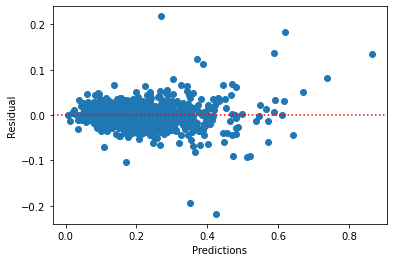

In [106]:
#verify assumptions of linear regression
plt.scatter( y_pred_train_1 , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

We observe that data is randomly distributed along y=0 axis but variance in data shows increasing trend,therefore heteroscdastic
Assumption of linear regression fails

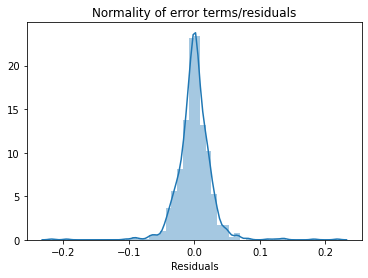

In [107]:
#checking distribution of error terms
sns.distplot(y_res)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

We observe that error terms are normally distributed

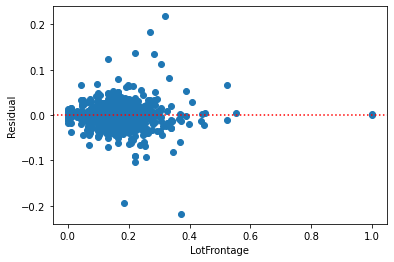

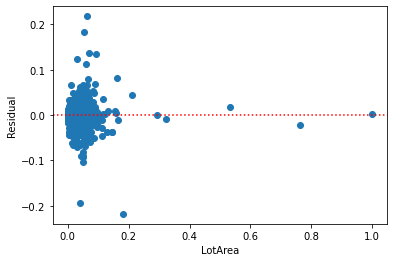

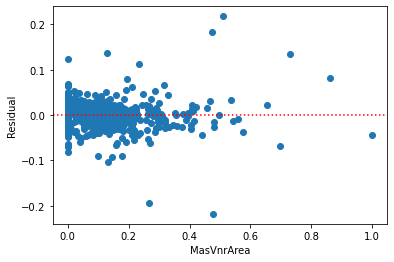

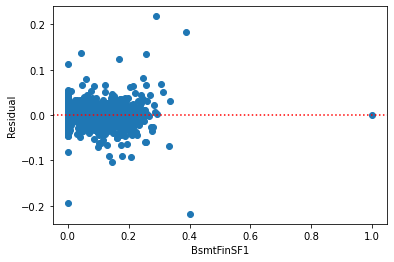

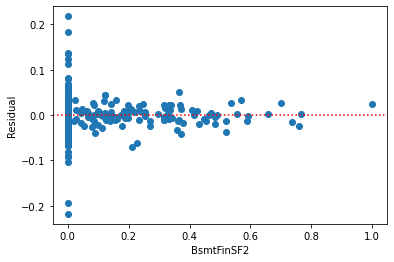

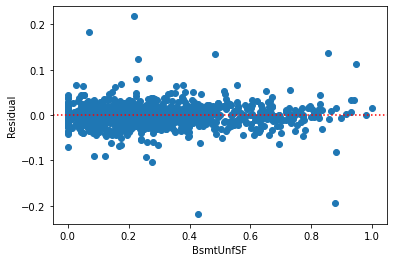

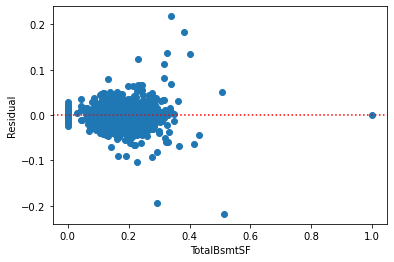

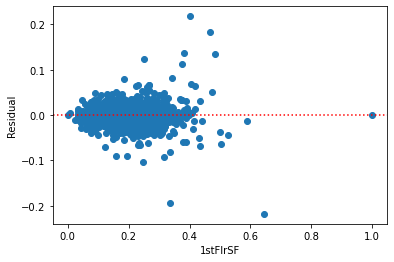

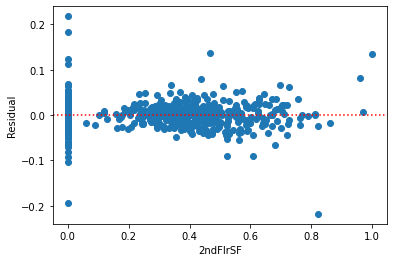

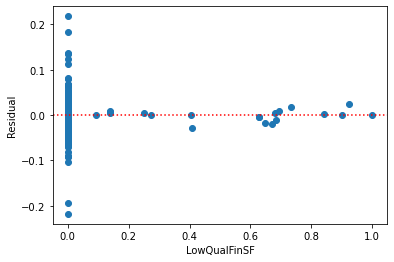

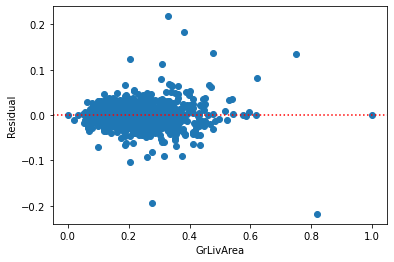

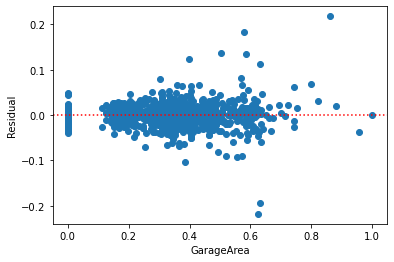

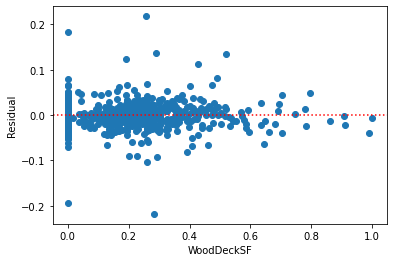

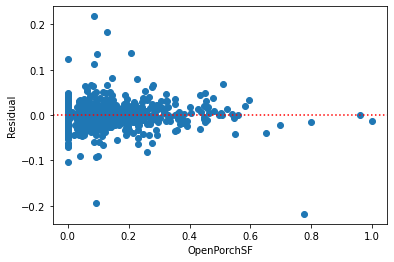

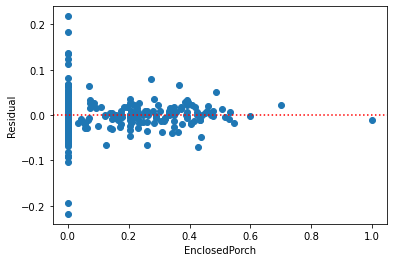

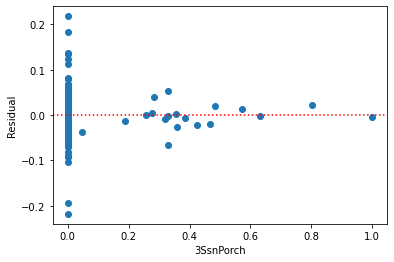

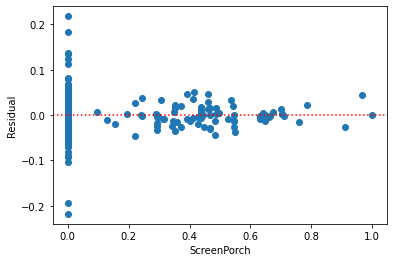

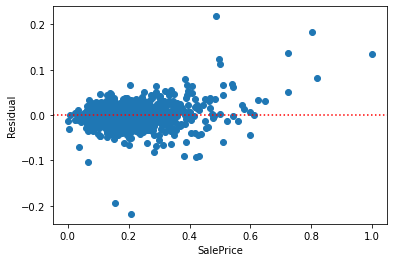

In [108]:
#check which variable is non-linearly related to the response variable
def plot_to_check_nonlinearity(col_name):
    plt.scatter( train_model[col_name] ,y_res)
    plt.axhline(y=0, color='r', linestyle=':')
    plt.xlabel(col_name)
    plt.ylabel("Residual")
    plt.show()
    
for col_name in house_price_df_continuous_final:
    plot_to_check_nonlinearity(col_name)

We observe that variables are randomly distributes and there is no linearity present,therefore we can say that increasing variance is caused by presence of outliers

### 5.3  Find r2score,rmse score on train and test

In [109]:
#calculating r2-score on training data
r2_train_1 = r2_score(y_train_1,y_pred_train_1)
r2_train_1

0.9430433942040721

In [110]:
#Adj r2 = 1-(1-R2)*((n-1)/(n-p-1))
print(1-(1-r2_train_1)*((len(X_train_1)-1)/(X_train_1.shape[1]-1)))

0.8109485950942981


In [111]:
#rss for train data
rss_train_1 = np.sum(np.square(y_train_1 - y_pred_train_1))
print(rss_train_1)

0.7029532326186447


In [112]:
#calculating mean square error on training data
mse_train_1 = mean_squared_error(y_train_1,y_pred_train_1)
print(mse_train_1)

0.0006891698359006321


In [113]:
#making predictions on test data
y_pred_test_1 = lm_1.predict(X_test_1)

In [114]:
#calculating r2-score on test data
r2_test_1 = r2_score(y_test_1,y_pred_test_1)
r2_test_1

-3.409563338561133e+18

In [115]:
#rss for test data
rss_test_1 = np.sum(np.square(y_test_1 - y_pred_test_1))
print(rss_test_1)

1.8346881064235303e+19


In [116]:
mse_test_1 = mean_squared_error(y_test_1,y_pred_test_1)
mse_test_1

4.18878563110395e+16

In [117]:
metric['model_1'] = {'r2_train':r2_train_1,'r2_test':r2_test_1,'rss_train':rss_train_1,'rss_test':rss_test_1,'mse_train':mse_train_1,'mse_test':mse_test_1,'alpha':'NA'}

In [118]:
print(metric)

{'model_1': {'r2_train': 0.9430433942040721, 'r2_test': -3.409563338561133e+18, 'rss_train': 0.7029532326186447, 'rss_test': 1.8346881064235303e+19, 'mse_train': 0.0006891698359006321, 'mse_test': 4.18878563110395e+16, 'alpha': 'NA'}}


### 6.Model Building And Evaluation : Model 2

##### 6.1 Build a Linear Regression Model using RFE with 30 features and perform ridge/lasso regularisation and find r2score,rmse score on train and test

In [119]:
#split in X and y for model2
#training data
y_train_2 = train_model['SalePrice']
X_train_2 = train_model.drop(['SalePrice'],axis=1,inplace=False)
#inspecting train data
print(X_train_2.shape)
print(y_train_2.shape)

(1020, 308)
(1020,)


In [120]:
#split in X and y for model2
#test data
y_test_2 = test_model['SalePrice']
X_test_2 = test_model.drop(['SalePrice'],axis=1,inplace=False)
#inspecting test data
print(X_test_2.shape)
print(y_test_2.shape)

(438, 308)
(438,)


In [121]:
#Instantiate
lm_2 = LinearRegression()

#create RFE model and select top 30 features
rfe = RFE(lm_2,30)
rfe.fit(X_train_2,y_train_2)

RFE(estimator=LinearRegression(), n_features_to_select=30)

In [122]:
#RFE ranking for all columns
list(zip(X_train_2.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 102),
 ('LotArea', False, 48),
 ('MasVnrArea', False, 60),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 39),
 ('BsmtUnfSF', False, 40),
 ('TotalBsmtSF', False, 38),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('GarageArea', False, 51),
 ('WoodDeckSF', False, 191),
 ('OpenPorchSF', False, 279),
 ('EnclosedPorch', False, 257),
 ('3SsnPorch', False, 176),
 ('ScreenPorch', False, 77),
 ('house_remod', False, 262),
 ('MSSubClass_30', False, 233),
 ('MSSubClass_40', False, 208),
 ('MSSubClass_45', False, 265),
 ('MSSubClass_50', False, 247),
 ('MSSubClass_60', False, 194),
 ('MSSubClass_70', False, 246),
 ('MSSubClass_75', False, 150),
 ('MSSubClass_80', False, 87),
 ('MSSubClass_85', False, 181),
 ('MSSubClass_90', True, 1),
 ('MSSubClass_120', False, 85),
 ('MSSubClass_160', False, 91),
 ('MSSubClass_180', False, 88),
 ('MSSubClass_190', False, 159),
 ('MSZoning_FV', False, 67),
 ('MSZoning_RH', False, 69

In [123]:
#top 30 features after RFE
top_30_features = X_train_2.columns[rfe.support_].tolist()
top_30_features

['BsmtFinSF1',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'MSSubClass_90',
 'BldgType_Duplex',
 'OverallQual_3',
 'OverallQual_7',
 'OverallQual_8',
 'OverallQual_9',
 'OverallQual_10',
 'OverallCond_3',
 'OverallCond_4',
 'OverallCond_5',
 'OverallCond_6',
 'OverallCond_7',
 'OverallCond_8',
 'OverallCond_9',
 'RoofMatl_WdShngl',
 'ExterCond_Po',
 'BsmtCond_Po',
 'BedroomAbvGr_8',
 'KitchenAbvGr_1',
 'TotRmsAbvGrd_12',
 'TotRmsAbvGrd_14',
 'Fireplaces_2',
 'Fireplaces_3',
 'GarageCars_3',
 'GarageQual_NA']

In [124]:
#Ridge Regression
# list of alphas to tune 
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge_1 = Ridge()

In [125]:
#cross validation
folds = 5
model_cv_1 = GridSearchCV(estimator = ridge_1,
                        param_grid = params,
                        scoring = 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score = True,
                        verbose = 1)
model_cv_1.fit(X_train_2[top_30_features],y_train_2)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [126]:
# Printing the best hyperparameter alpha
print(model_cv_1.best_params_)

{'alpha': 0.0001}


In [127]:
#Fitting Ridge model using alpha=0.8
alpha = model_cv_1.best_params_['alpha']
ridge_1 = Ridge(alpha = alpha)
ridge_1.fit(X_train_2[top_30_features],y_train_2)

Ridge(alpha=0.0001)

In [128]:
#penalised coefficients
ridge_coef_df = pd.DataFrame({'Features':X_train_2[top_30_features].columns.tolist(),
                            'Coefficients':ridge_1.coef_})
ridge_coef_df = ridge_coef_df.sort_values(by=['Coefficients'],ascending=False)
ridge_coef_df.head(30)

,Features,Coefficients
1,1stFlrSF,0.223921
4,GrLivArea,0.202187
10,OverallQual_9,0.186321
11,OverallQual_10,0.174557
0,BsmtFinSF1,0.161100
19,RoofMatl_WdShngl,0.117682
9,OverallQual_8,0.091644
23,KitchenAbvGr_1,0.063513
2,2ndFlrSF,0.057618
8,OverallQual_7,0.051188


In [129]:
#model evaluation on train data
y_pred_train_2 = ridge_1.predict(X_train_2[top_30_features])
r2_train_2 = r2_score(y_train_2,y_pred_train_2)
r2_train_2

0.816315384463836

In [130]:
#rss for train data
rss_train_2 = np.sum(np.square(y_train_2 - y_pred_train_2))
print(rss_train_2)

2.2670187675174125


In [131]:
#model evaluation on test data
y_pred_test_2 = ridge_1.predict(X_test_2[top_30_features])
r2_test_2 = r2_score(y_test_2,y_pred_test_2)
r2_test_2

0.8084885764746979

In [132]:
#rss for test data
rss_test_2 = np.sum(np.square(y_test_2 - y_pred_test_2))
print(rss_test_2)

1.0305241349010696


In [133]:
#mse train
mse_train_2 = mean_squared_error(y_train_2,y_pred_train_2)
mse_train_2

0.002222567419134718

In [134]:
#mse test (how is mse test lower that mse train)
mse_test_2 = mean_squared_error(y_test_2,y_pred_test_2)
mse_test_2

0.0023527948285412548

In [135]:
metric['model_2_ridge'] = {'r2_train':r2_train_2,'r2_test':r2_test_2,'rss_train':rss_train_2,'rss_test':rss_test_2,'mse_train':mse_train_2,'mse_test':mse_test_2,'alpha':model_cv_1.best_params_['alpha']}

In [136]:
#Lasso
lasso_1 = Lasso()

#cross validation
model_cv_2 = GridSearchCV(estimator = lasso_1,
             param_grid = params,
            scoring = 'neg_mean_absolute_error',
            cv = folds,
            return_train_score = True,
            verbose=1)
model_cv_2.fit(X_train_2[top_30_features],y_train_2)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [137]:
#Printing the best hyperparameter alpha
print(model_cv_2.best_params_)

{'alpha': 0.0001}


In [138]:
#Fitting Lasso model for alpha=0.0001
alpha = model_cv_2.best_params_['alpha']
lasso_1 = Lasso(alpha = alpha)
lasso_1.fit(X_train_2[top_30_features],y_train_2)

Lasso(alpha=0.0001)

In [139]:
#printing penalised coefficients
lasso_coef_df = pd.DataFrame({'Features':X_train_2[top_30_features].columns.tolist(),
                            'Coefficients':lasso_1.coef_})
lasso_coef_df = lasso_coef_df.sort_values(by=['Coefficients'],ascending=False)
lasso_coef_df.head(30)

,Features,Coefficients
4,GrLivArea,3.543101e-01
10,OverallQual_9,1.823532e-01
11,OverallQual_10,1.698320e-01
0,BsmtFinSF1,1.486629e-01
19,RoofMatl_WdShngl,9.498874e-02
9,OverallQual_8,9.112151e-02
1,1stFlrSF,8.482334e-02
28,GarageCars_3,5.379508e-02
8,OverallQual_7,5.074320e-02
23,KitchenAbvGr_1,4.969072e-02


In [140]:
#Model evaluation on train data
y_pred_train_2 = lasso_1.predict(X_train_2[top_30_features])
r2_train_2 = r2_score(y_train_2,y_pred_train_2)
r2_train_2

0.8143003552701373

In [141]:
#rss for train data
rss_train_2 = np.sum(np.square(y_train_2 - y_pred_train_2))
print(rss_train_2)

2.2918880739962164


In [142]:
#model evaluation on test data
y_pred_test_2 = lasso_1.predict(X_test_2[top_30_features])
r2_test_2 = r2_score(y_test_2,y_pred_test_2)
r2_test_2

0.8132544983486315

In [143]:
#rss for test data
rss_test_2 = np.sum(np.square(y_test_2 - y_pred_test_2))
print(rss_test_2)

1.004878680307638


In [144]:
#mse train
mse_train_2 = mean_squared_error(y_train_2,y_pred_train_2)
mse_train_2

0.0022469490921531534

In [145]:
#mse test (how is mse test lower that mse train)
mse_test_2 = mean_squared_error(y_test_2,y_pred_test_2)
mse_test_2

0.0022942435623462053

In [146]:
metric['model_2_lasso'] = {'r2_train':r2_train_2,'r2_test':r2_test_2,'rss_train':rss_train_2,'rss_test':rss_test_2,'mse_train':mse_train_2,'mse_test':mse_test_2,'alpha':model_cv_2.best_params_['alpha']}

### 7.Model Building And Evaluation : Model 3

##### 7.1 Build a Linear Regression Model and perform ridge regularisation and find r2score,rmse score on train and test (without RFE)

In [147]:
#split in X and y for model3
#training data
y_train_3 = train_model['SalePrice']
X_train_3 = train_model.drop(['SalePrice'],axis=1,inplace=False)
#inspecting train data
print(X_train_3.shape)
print(y_train_3.shape)

(1020, 308)
(1020,)


In [148]:
#split in X and y for model2
#test data
y_test_3 = test_model['SalePrice']
X_test_3 = test_model.drop(['SalePrice'],axis=1,inplace=False)
#inspecting test data
print(X_test_3.shape)
print(y_test_3.shape)

(438, 308)
(438,)


In [149]:
#Instantiate
lm_3 = LinearRegression()

#Fit a line
lm_3.fit(X_train_3,y_train_3)

LinearRegression()

In [150]:
#print coefficient and intercept
print(lm_3.intercept_)
print(lm_3.coef_)

6362199497.105979
[ 1.22588129e-02  1.42456709e-01  6.97504374e-02  8.45284615e+09
  2.20756471e+09  3.06423161e+09 -9.15076009e+09 -5.42224956e+09
 -2.32915355e+09 -7.11685807e+08  6.60424521e+09  6.87258244e-02
  1.14073306e-02  1.39474869e-05  2.11864710e-03  1.98548287e-02
  1.81082636e-02  1.12225115e-03 -6.05010986e-03  3.03629041e-03
  1.57418847e-03 -1.38455629e-02 -1.14343166e-02 -7.32579827e-03
  1.80538893e-02 -4.08941507e-02 -3.02901268e-02 -2.69488716e+09
 -2.33530998e-02 -3.04059982e-02 -5.31847775e-02  1.45770609e-02
  5.01853228e-02  3.06574851e-02  4.17690277e-02  3.58464718e-02
  6.96946979e-02 -3.75199318e-03 -2.19577551e-03  1.07413530e-02
  3.33300829e-02  1.90067291e-03  5.03504276e-03 -7.19678402e-03
  1.39985085e-02  2.79750303e+09  1.34079456e-02 -1.45445466e-02
 -2.71715447e-02 -4.52280045e-03  1.62460804e-02 -2.36299038e-02
  2.66618580e-02  1.24931335e-04 -1.64583921e-02 -8.82238150e-03
 -1.31262541e-02  8.08483362e-03 -3.45801115e-02 -1.54631138e-02
 -2.989

In [151]:
#Ridge Regression
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_2 = Ridge()

#cross validation

model_cv_3 = GridSearchCV(estimator = ridge_2,
            param_grid = params,
            scoring = 'neg_mean_absolute_error',
            cv = folds,
            return_train_score = True,
            verbose = 1)

model_cv_3.fit(X_train_3,y_train_3)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.1s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [152]:
#best value of alpha
print(model_cv_3.best_params_)

{'alpha': 10.0}


In [153]:
#fitting Ridge model with alpha =10
alpha = model_cv_3.best_params_['alpha']
ridge_2 = Ridge(alpha=alpha)
ridge_2.fit(X_train_3,y_train_3)

Ridge(alpha=10.0)

In [154]:
#printing peanalised coefficients
ridge_coef_df = pd.DataFrame({'Features':X_train_3.columns.tolist(),
                            'Coefficients':ridge_2.coef_})
ridge_coef_df = ridge_coef_df.sort_values(by=['Coefficients'],ascending=False)
ridge_coef_df.head(30)

,Features,Coefficients
110,OverallQual_10,0.046178
109,OverallQual_9,0.042199
73,Neighborhood_StoneBr,0.042140
10,GrLivArea,0.037869
130,RoofMatl_WdShngl,0.036925
66,Neighborhood_NoRidge,0.035737
8,2ndFlrSF,0.033465
243,TotRmsAbvGrd_10,0.033410
2,MasVnrArea,0.032755
7,1stFlrSF,0.030954


In [155]:
#model evaluation on train
y_pred_train_3 = ridge_2.predict(X_train_3)
r2_train_3 = r2_score(y_train_3,y_pred_train_3)
r2_train_3

0.8991217639751065

In [156]:
#rss for train data
rss_train_3 = np.sum(np.square(y_train_3 - y_pred_train_3))
print(rss_train_3)

1.245029985962321


In [157]:
#model evaluation on test
y_pred_test_3 = ridge_2.predict(X_test_3)
r2_test_3 = r2_score(y_test_3,y_pred_test_3)
r2_test_3

0.8718174112134719

In [158]:
#rss for test data
rss_test_3 = np.sum(np.square(y_test_3 - y_pred_test_3))
print(rss_test_3)

0.6897512899598084


In [159]:
#mse for train
mse_train_3 = mean_squared_error(y_train_3,y_pred_train_3)
mse_train_3

0.0012206176332963932

In [160]:
#mse for test
mse_test_3 = mean_squared_error(y_test_3,y_pred_test_3)
mse_test_3

0.0015747746346114347

In [161]:
metric['model_3_ridge'] = {'r2_train':r2_train_3,'r2_test':r2_test_3,'rss_train':rss_train_3,'rss_test':rss_test_3,'mse_train':mse_train_3,'mse_test':mse_test_3,'alpha':model_cv_3.best_params_['alpha']}

In [162]:
#Lasso
lasso_2 = Lasso()

#crossvalidation
model_cv_4 = GridSearchCV(estimator = lasso_2,
            param_grid = params,
            scoring = 'neg_mean_absolute_error',
            cv = folds,
            return_train_score = True,
            verbose = 1)

model_cv_4.fit(X_train_3,y_train_3)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [163]:
#printing the best hyperparameter
print(model_cv_4.best_params_)

{'alpha': 0.0001}


In [164]:
#Fitting Lasso with alpha=0.0001
alpha = model_cv_4.best_params_['alpha']
lasso_2 = Lasso(alpha=alpha)
lasso_2.fit(X_train_3,y_train_3)

Lasso(alpha=0.0001)

In [165]:
#printing coefficients
lasso_coef_df = pd.DataFrame({'Features':X_train_3.columns.tolist(),
                            'Coefficients':lasso_2.coef_})
lasso_coef_df = lasso_coef_df.sort_values(by=['Coefficients'],ascending=False)
lasso_coef_df.head(30)

,Features,Coefficients
10,GrLivArea,0.243597
110,OverallQual_10,0.112977
130,RoofMatl_WdShngl,0.095411
109,OverallQual_9,0.084643
73,Neighborhood_StoneBr,0.062550
1,LotArea,0.055623
2,MasVnrArea,0.050415
66,Neighborhood_NoRidge,0.039293
67,Neighborhood_NridgHt,0.038391
108,OverallQual_8,0.029715


In [166]:
#model evaluation on train data
y_pred_train_3 = lasso_2.predict(X_train_3)
r2_train_3 = r2_score(y_train_3,y_pred_train_3)
r2_train_3

0.9135492148741742

In [167]:
#model evaluation on test data
y_pred_test_3 = lasso_2.predict(X_test_3)
r2_test_3 = r2_score(y_test_3,y_pred_test_3)
r2_test_3

0.8823499327841379

In [168]:
#rss for train data
rss_train_3 = np.sum(np.square(y_train_3 - y_pred_train_3))
print(rss_train_3)

1.0669677031731406


In [169]:
#rss for test data
rss_test_3 = np.sum(np.square(y_test_3 - y_pred_test_3))
print(rss_test_3)

0.6330757273216175


In [170]:
#mse for train data
mse_train_3 = mean_squared_error(y_train_3,y_pred_train_3)
mse_train_3

0.0010460467678168044

In [171]:
#mse for test data
mse_test_3 = mean_squared_error(y_test_3,y_pred_test_3)
mse_test_3

0.0014453783728804054

In [172]:
metric['model_3_lasso'] = {'r2_train':r2_train_3,'r2_test':r2_test_3,'rss_train':rss_train_3,'rss_test':rss_test_3,'mse_train':mse_train_3,'mse_test':mse_test_3,'alpha':model_cv_4.best_params_['alpha']}

In [173]:
metric

{'model_1': {'r2_train': 0.9430433942040721,
  'r2_test': -3.409563338561133e+18,
  'rss_train': 0.7029532326186447,
  'rss_test': 1.8346881064235303e+19,
  'mse_train': 0.0006891698359006321,
  'mse_test': 4.18878563110395e+16,
  'alpha': 'NA'},
 'model_2_ridge': {'r2_train': 0.816315384463836,
  'r2_test': 0.8084885764746979,
  'rss_train': 2.2670187675174125,
  'rss_test': 1.0305241349010696,
  'mse_train': 0.002222567419134718,
  'mse_test': 0.0023527948285412548,
  'alpha': 0.0001},
 'model_2_lasso': {'r2_train': 0.8143003552701373,
  'r2_test': 0.8132544983486315,
  'rss_train': 2.2918880739962164,
  'rss_test': 1.004878680307638,
  'mse_train': 0.0022469490921531534,
  'mse_test': 0.0022942435623462053,
  'alpha': 0.0001},
 'model_3_ridge': {'r2_train': 0.8991217639751065,
  'r2_test': 0.8718174112134719,
  'rss_train': 1.245029985962321,
  'rss_test': 0.6897512899598084,
  'mse_train': 0.0012206176332963932,
  'mse_test': 0.0015747746346114347,
  'alpha': 10.0},
 'model_3_lasso

In [174]:
#Creating a table which contains all the metrics
lr_table = { 'Metric':['R2 Score (Train)','R2 Score (Test)','RSS Score (Train)','RSS Score (Test)',
                       'MSE (Train)','MSE (Test)','alpha'],
              'Model_1':list(metric['model_1'].values()),
              'Model_2_Ridge':list(metric['model_2_ridge'].values()),
              'Model_2_Lasso':list(metric['model_2_lasso'].values()),
              'Model_3_Ridge':list(metric['model_3_ridge'].values()),
              'Model_3_Lasso':list(metric['model_3_lasso'].values()),
           }
evaluation_table = pd.DataFrame(lr_table)
evaluation_table.head(7)


,Metric,Model_1,Model_2_Ridge,Model_2_Lasso,Model_3_Ridge,Model_3_Lasso
0,R2 Score (Train),0.943043,0.816315,0.814300,0.899122,0.913549
1,R2 Score (Test),-3.40956e+18,0.808489,0.813254,0.871817,0.882350
2,RSS Score (Train),0.702953,2.267019,2.291888,1.245030,1.066968
3,RSS Score (Test),1.83469e+19,1.030524,1.004879,0.689751,0.633076
4,MSE (Train),0.00068917,0.002223,0.002247,0.001221,0.001046
5,MSE (Test),4.18879e+16,0.002353,0.002294,0.001575,0.001445
6,alpha,NA,0.000100,0.000100,10.000000,0.000100


From the above analysis we conclude that Model_3_Lasso model is the most optimal one as it has a low bias and low variance

### Result of Analysis

###### Which variables are significant in predicting the price of a house

Top 10 features for predicting the house price are:-
1.  GrLivArea : Above grade (ground) living area square feet
2. OverallQual_10 : Rates the overall material and finish of the house:Very                         Excellent
3. RoofMatl_WdShngl :Roof material - Wood Shingles 
4. OverallQual_9 : Rates the overall material and finish of the house:                           Excellent
5. Neighborhood_StoneBr :physical locations within Ames city limits
6. LotArea :Lot size in square feet
7. MasVnrArea :Masonry veneer area in square feet
8. Neighborhood_NoRidge :physical locations within Ames city limits
9. Neighborhood_NridgHt :physical locations within Ames city limits
10. OverallQual_8 :Rates the overall material and finish of the house:                           Very Good

### 8.For Assignment : Model 4 : Delete top 5 predictor variables

##### 81 Build a Linear Regression Model and perform ridge regularisation and find r2score,rmse score on train and test

In [175]:
#split in X and y for model3
#training data
y_train_4 = train_model['SalePrice']
X_train_4 = train_model.drop(['SalePrice','GrLivArea','OverallQual_10','RoofMatl_WdShngl','OverallQual_9','Neighborhood_StoneBr'],axis=1,inplace=False)
#inspecting train data
print(X_train_4.shape)
print(y_train_4.shape)

(1020, 303)
(1020,)


In [176]:
#split in X and y for model3
#test data
y_test_4 = test_model['SalePrice']
X_test_4 = test_model.drop(['SalePrice','GrLivArea','OverallQual_10','RoofMatl_WdShngl','OverallQual_9','Neighborhood_StoneBr'],axis=1,inplace=False)
#inspecting test data
print(X_test_4.shape)
print(y_test_4.shape)

(438, 303)
(438,)


In [177]:
#Instantiate
lm_4 = LinearRegression()

#Fit a line
lm_4.fit(X_train_4,y_train_4)

LinearRegression()

In [178]:
#print coefficient and intercept
print(lm_4.intercept_)
print(lm_4.coef_)

131209327525.09619
[-6.15519655e-02  2.43623157e-01  8.82565455e-02  8.39101170e+09
  2.19141588e+09  3.04181608e+09 -9.08382025e+09  2.61074631e-01
  1.26702749e-01  8.80897045e-04  3.69541645e-02  1.20998621e-02
  1.62917376e-03  7.10803270e-03  3.06651797e-02  2.49403566e-02
  2.29263306e-03 -9.44042206e-03 -1.60945356e-02  1.01810396e-02
 -3.30867022e-02 -5.43253422e-02 -4.00066972e-02  1.34110451e-02
 -7.81981722e-02 -7.73732960e-02  3.24750927e+10 -7.11870193e-03
 -4.44058180e-02 -8.00781846e-02  3.81003320e-03  3.97697687e-02
  6.91190362e-05  2.85115242e-02  2.65963078e-02  8.78218412e-02
  1.75714493e-03  3.42494249e-03  1.44229829e-03 -3.56359780e-02
  1.97410583e-03  1.62481666e-02 -2.54327059e-03  2.50072479e-02
  1.18392827e+10  1.17235184e-02 -1.87344551e-02 -2.88750525e-02
 -4.91812825e-03  1.57943964e-02 -2.77193412e-02 -4.36546318e-02
 -5.20333648e-02 -7.03019351e-02 -4.44673598e-02 -4.78277802e-02
 -3.97017598e-02 -8.30898285e-02 -5.15436977e-02 -8.16876888e-02
 -6.33

In [179]:
#Ridge Regression
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_3 = Ridge()

#cross validation

model_cv_4 = GridSearchCV(estimator = ridge_3,
            param_grid = params,
            scoring = 'neg_mean_absolute_error',
            cv = folds,
            return_train_score = True,
            verbose = 1)

model_cv_4.fit(X_train_4,y_train_4)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.8s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [180]:
#best value of alpha
print(model_cv_4.best_params_)

{'alpha': 10.0}


In [181]:
#fitting Ridge model with alpha =10
alpha = model_cv_4.best_params_['alpha']
ridge_3 = Ridge(alpha=alpha)
ridge_3.fit(X_train_4,y_train_4)

Ridge(alpha=10.0)

In [182]:
#printing peanalised coefficients
ridge_coef_df = pd.DataFrame({'Features':X_train_4.columns.tolist(),
                            'Coefficients':ridge_3.coef_})
ridge_coef_df = ridge_coef_df.sort_values(by=['Coefficients'],ascending=False)
ridge_coef_df.head(30)

,Features,Coefficients
7,1stFlrSF,0.038960
238,TotRmsAbvGrd_10,0.036595
2,MasVnrArea,0.036473
8,2ndFlrSF,0.036337
65,Neighborhood_NoRidge,0.034417
215,FullBath_3,0.033066
249,Fireplaces_2,0.030188
178,BsmtExposure_Gd,0.029685
66,Neighborhood_NridgHt,0.027696
267,GarageCars_3,0.025935


In [183]:
#model evaluation on train
y_pred_train_4 = ridge_3.predict(X_train_4)
r2_train_4 = r2_score(y_train_4,y_pred_train_4)
r2_train_4

0.8870908665466574

In [184]:
#rss for train data
rss_train_4 = np.sum(np.square(y_train_4 - y_pred_train_4))
print(rss_train_4)

1.3935142244531669


In [185]:
#model evaluation on test
y_pred_test_4 = ridge_3.predict(X_test_4)
r2_test_4 = r2_score(y_test_4,y_pred_test_4)
r2_test_4

0.8612482632348442

In [186]:
#rss for test data
rss_test_4 = np.sum(np.square(y_test_4 - y_pred_test_4))
print(rss_test_4)

0.74662393952203


In [187]:
#mse for train
mse_train_4 = mean_squared_error(y_train_4,y_pred_train_4)
mse_train_4

0.0013661904161305558

In [188]:
#mse for test
mse_test_4 = mean_squared_error(y_test_4,y_pred_test_4)
mse_test_4

0.001704620866488653

In [189]:
metric['model_4_ridge'] = {'r2_train':r2_train_4,'r2_test':r2_test_4,'rss_train':rss_train_4,'rss_test':rss_test_4,'mse_train':mse_train_4,'mse_test':mse_test_4,'alpha':model_cv_4.best_params_['alpha']}

In [190]:
#Creating a table which contains all the metrics
lr_table = { 'Metric':['R2 Score (Train)','R2 Score (Test)','RSS Score (Train)','RSS Score (Test)',
                       'MSE (Train)','MSE (Test)','alpha'],
              'Model_1':list(metric['model_1'].values()),
              'Model_2_Ridge':list(metric['model_2_ridge'].values()),
              'Model_2_Lasso':list(metric['model_2_lasso'].values()),
              'Model_3_Ridge':list(metric['model_3_ridge'].values()),
              'Model_3_Lasso':list(metric['model_3_lasso'].values()),
              'Model_4_Ridge':list(metric['model_4_ridge'].values()),
           }
evaluation_table = pd.DataFrame(lr_table)
evaluation_table.head(7)

,Metric,Model_1,Model_2_Ridge,Model_2_Lasso,Model_3_Ridge,Model_3_Lasso,Model_4_Ridge
0,R2 Score (Train),0.943043,0.816315,0.814300,0.899122,0.913549,0.887091
1,R2 Score (Test),-3.40956e+18,0.808489,0.813254,0.871817,0.882350,0.861248
2,RSS Score (Train),0.702953,2.267019,2.291888,1.245030,1.066968,1.393514
3,RSS Score (Test),1.83469e+19,1.030524,1.004879,0.689751,0.633076,0.746624
4,MSE (Train),0.00068917,0.002223,0.002247,0.001221,0.001046,0.001366
5,MSE (Test),4.18879e+16,0.002353,0.002294,0.001575,0.001445,0.001705
6,alpha,NA,0.000100,0.000100,10.000000,0.000100,10.000000
